In [1]:
pip install omadb  pandas seaborn numpy scipy pyham SPARQLWrapper networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 42.2 MB/s eta 0:00:00m eta 0:00:010:0101
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 29.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 22.1 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 40.9 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 36.5 MB/s eta 0:00:00m eta 0:00:010:0101
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 38.2 MB/s eta 0:00:00m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.2/829.2 kB 34.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... don

In [2]:
#Obtain a list of genes from uniprot.

import json
import requests

def unirequest_tab(GOterm):
    url = 'http://rest.uniprot.org/uniprotkb/stream?'
    params = [
    'query=(organism_id:9606)%20AND%20(go:{})'.format(GOterm),
    'fields=id,gene_names,protein_name,reviewed,protein_name,organism_name,xref_bgee',
    'format=tsv',
    ]
    params = ''.join([ p+'&' for p in params ])[:-1]
    print(url+params)
    data = requests.get(url+params).text
    
    return data
#here we pull in our proteins of interest for each biological process
terms = ['0030509' ,'0031929']
pathways = ['BMP', 'TOR']
datasets = { t:unirequest_tab(t) for t in terms}



http://rest.uniprot.org/uniprotkb/stream?query=(organism_id:9606)%20AND%20(go:0030509)&fields=id,gene_names,protein_name,reviewed,protein_name,organism_name,xref_bgee&format=tsv
http://rest.uniprot.org/uniprotkb/stream?query=(organism_id:9606)%20AND%20(go:0031929)&fields=id,gene_names,protein_name,reviewed,protein_name,organism_name,xref_bgee&format=tsv


In [3]:
import pandas as pd
import numpy as np
from io import StringIO

#Load queries into some dataframes

queries =[]
for i,term in enumerate(datasets):
    df = pd.read_table(StringIO(datasets[term]))
    print(df.head())
    df['pathway'] = pathways[i]
    df['protein_name'] = df['Protein names'].map( lambda x : x.split(',')[0])

    df = df[df.Reviewed != 'unreviewed']
    df['short_name'] = df['Gene Names'].map( lambda x : x.split(' ')[0])
    #let's subsample to a few entries for the sake of brevity 
    df = df.sample(n = 20)
    print(df.head())
    queries.append(df)
    

#Total starting dataset
queries = pd.concat(queries)
#in this line we iterate through the dataframe to generate a dictionary of names we will use to identify our proteins at each step of our analysis.
names= { query['Entry Name']:query['short_name'] + ' '+query.pathway for index,query in queries[['Entry Name','short_name','pathway']].iterrows() if query['short_name'] is not np.nan }

         Entry Name       Gene Names  \
0  A0A024R274_HUMAN  SMAD4 hCG_23686   
1  A0A024R8E2_HUMAN   ABL1 hCG_28416   
2  A0A0S2Z310_HUMAN           ACVRL1   
3  A0A140VJU3_HUMAN              NaN   
4  A0A384N611_HUMAN              NaN   

                                       Protein names    Reviewed  \
0  Mothers against decapentaplegic homolog, MAD h...  unreviewed   
1               Tyrosine-protein kinase, EC 2.7.10.2  unreviewed   
2  Serine/threonine-protein kinase receptor, EC 2...  unreviewed   
3                   Testicular tissue protein Li 170  unreviewed   
4                                        Protein Wnt  unreviewed   

                                     Protein names.1              Organism  \
0  Mothers against decapentaplegic homolog, MAD h...  Homo sapiens (Human)   
1               Tyrosine-protein kinase, EC 2.7.10.2  Homo sapiens (Human)   
2  Serine/threonine-protein kinase receptor, EC 2...  Homo sapiens (Human)   
3                   Testicular tissue 

In [4]:
queries

,Entry Name,Gene Names,Protein names,Reviewed,Protein names.1,Organism,Bgee,pathway,protein_name,short_name
67,GDF6_HUMAN,GDF6 BMP13 GDF16,"Growth/differentiation factor 6, GDF-6 (Bone m...",reviewed,"Growth/differentiation factor 6, GDF-6 (Bone m...",Homo sapiens (Human),ENSG00000156466;,BMP,Growth/differentiation factor 6,GDF6
56,BMPR2_HUMAN,BMPR2 PPH1,"Bone morphogenetic protein receptor type-2, BM...",reviewed,"Bone morphogenetic protein receptor type-2, BM...",Homo sapiens (Human),ENSG00000204217;,BMP,Bone morphogenetic protein receptor type-2,BMPR2
25,BMP4_HUMAN,BMP4 BMP2B DVR4,"Bone morphogenetic protein 4, BMP-4 (Bone morp...",reviewed,"Bone morphogenetic protein 4, BMP-4 (Bone morp...",Homo sapiens (Human),ENSG00000125378;,BMP,Bone morphogenetic protein 4,BMP4
85,SMAD5_HUMAN,SMAD5 MADH5,"Mothers against decapentaplegic homolog 5, MAD...",reviewed,"Mothers against decapentaplegic homolog 5, MAD...",Homo sapiens (Human),ENSG00000113658;,BMP,Mothers against decapentaplegic homolog 5,SMAD5
77,TMPS6_HUMAN,TMPRSS6 UNQ354/PRO618,"Transmembrane protease serine 6, EC 3.4.21.- (...",reviewed,"Transmembrane protease serine 6, EC 3.4.21.- (...",Homo sapiens (Human),ENSG00000187045;,BMP,Transmembrane protease serine 6,TMPRSS6
83,SFRP2_HUMAN,SFRP2 FRP2 SARP1 FKSG12 UNQ361/PRO697,"Secreted frizzled-related protein 2, FRP-2, sF...",reviewed,"Secreted frizzled-related protein 2, FRP-2, sF...",Homo sapiens (Human),ENSG00000145423;,BMP,Secreted frizzled-related protein 2,SFRP2
36,MK03_HUMAN,MAPK3 ERK1 PRKM3,"Mitogen-activated protein kinase 3, MAP kinase...",reviewed,"Mitogen-activated protein kinase 3, MAP kinase...",Homo sapiens (Human),ENSG00000102882;,BMP,Mitogen-activated protein kinase 3,MAPK3
74,BMP8A_HUMAN,BMP8A,"Bone morphogenetic protein 8A, BMP-8A",reviewed,"Bone morphogenetic protein 8A, BMP-8A",Homo sapiens (Human),ENSG00000183682;,BMP,Bone morphogenetic protein 8A,BMP8A
80,BMPER_HUMAN,BMPER KIAA1965,BMP-binding endothelial regulator protein (Bon...,reviewed,BMP-binding endothelial regulator protein (Bon...,Homo sapiens (Human),ENSG00000164619;,BMP,BMP-binding endothelial regulator protein (Bon...,BMPER
17,DLX3_HUMAN,DLX3,Homeobox protein DLX-3,reviewed,Homeobox protein DLX-3,Homo sapiens (Human),ENSG00000064195;,BMP,Homeobox protein DLX-3,DLX3


In [5]:
from omadb import Client
c = Client()
omadata = {}
#retrieve oma entries for all query genes
for query in list(queries['Entry Name']) :
    try:
        omadata[query] = c.entries.__getitem__(query) 
    except:
        print('err ' +query)

#Take all queries from human and
#get orthologs in all of the species they're found in
orthologs = {}
for query in omadata:
    orthologs[query] = c.entries.orthologs(omadata[query]['omaid'])

#Create profiles from orthology data, with species codes as columns
#obtain all species codes for query genes
profiles = {}
for query in orthologs:
    profiles[query] = {}
    profiles[query]['short_name'] = names[query]
    for ortho in orthologs[query]:
        spec = ortho['omaid'][0:5]
        if spec not in profiles[query]:
            profiles[query][spec] = 1
        else:
            profiles[query][spec]+=1

#The columns of the matrix are the union of all the species represented across all orthologs
columns = set([ spec  for query in profiles for spec in profiles[query] ])
#Add in 0s where the orthologs are absent
for query in profiles:
    profiles[query].update( { spec : 0 for spec in columns if spec not in profiles[query] } )

#Create a dataframe with this dictionary

orthosdf = pd.DataFrame.from_dict( profiles , orient = 'index')
orthosdf.index = orthosdf.short_name
orthosdf = orthosdf.drop('short_name', axis = 1)


In [6]:
orthosdf.head()

,BRAFL,PETMA,EPTBU,CALMI,LEPOC,ANGAN,ANATE,SERDU,ECHNA,CYNSE,...,WHEAT,BODSA,ENTHI,MEGSC,PUNST,CAPTE,ARTOC,COLGR,SPAPN,CRYNJ
short_name,,,,,,,,,,,,,,,,,,,,,
GDF6 BMP,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
BMPR2 BMP,0,2,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BMP4 BMP,0,1,2,1,1,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0
SMAD5 BMP,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
TMPRSS6 BMP,0,0,0,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


/home/cactuskid/miniconda3/envs/f1000/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


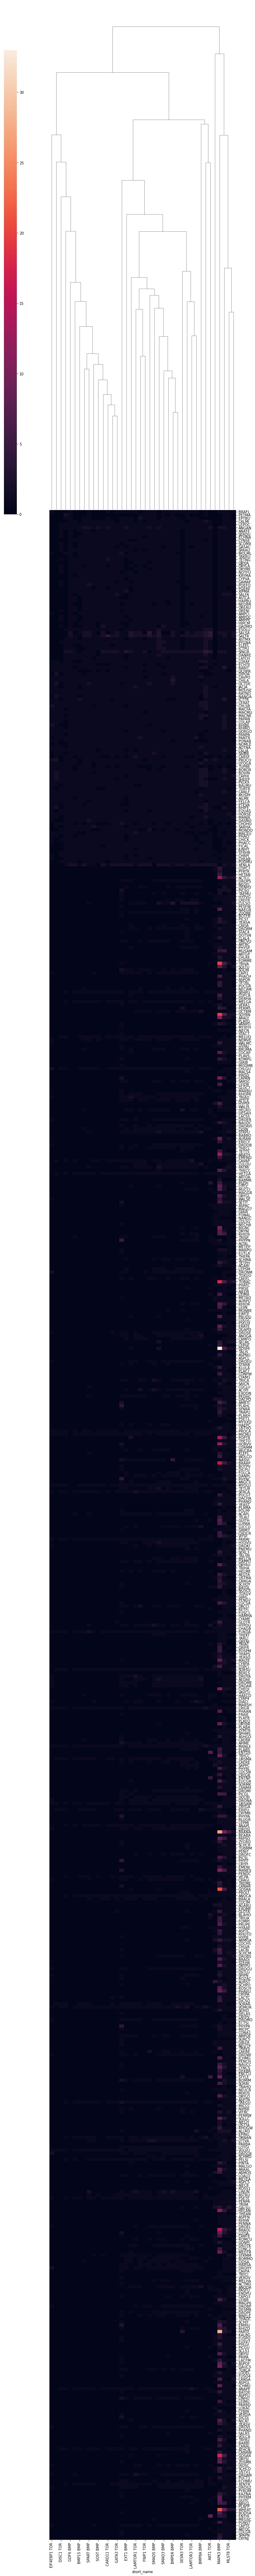

In [7]:
#Use seaborn to visualize the clustering of functional modules

import seaborn as sns
from matplotlib import pyplot as plt

#Metrics used to compare the vectors to establish a distance kernel
metrics = [ 'euclidean', 'hamming', 'jaccard' ]

#Hierarchical clustering methods
methods = [ 'average' , 'weighted' , 'centroid']

#Visualize the clustered profile matrix
sns.clustermap( orthosdf.T , metric= metrics[2] , method=methods[1] , col_cluster=True, row_cluster= False, yticklabels = orthosdf.columns , figsize = (10, 100))


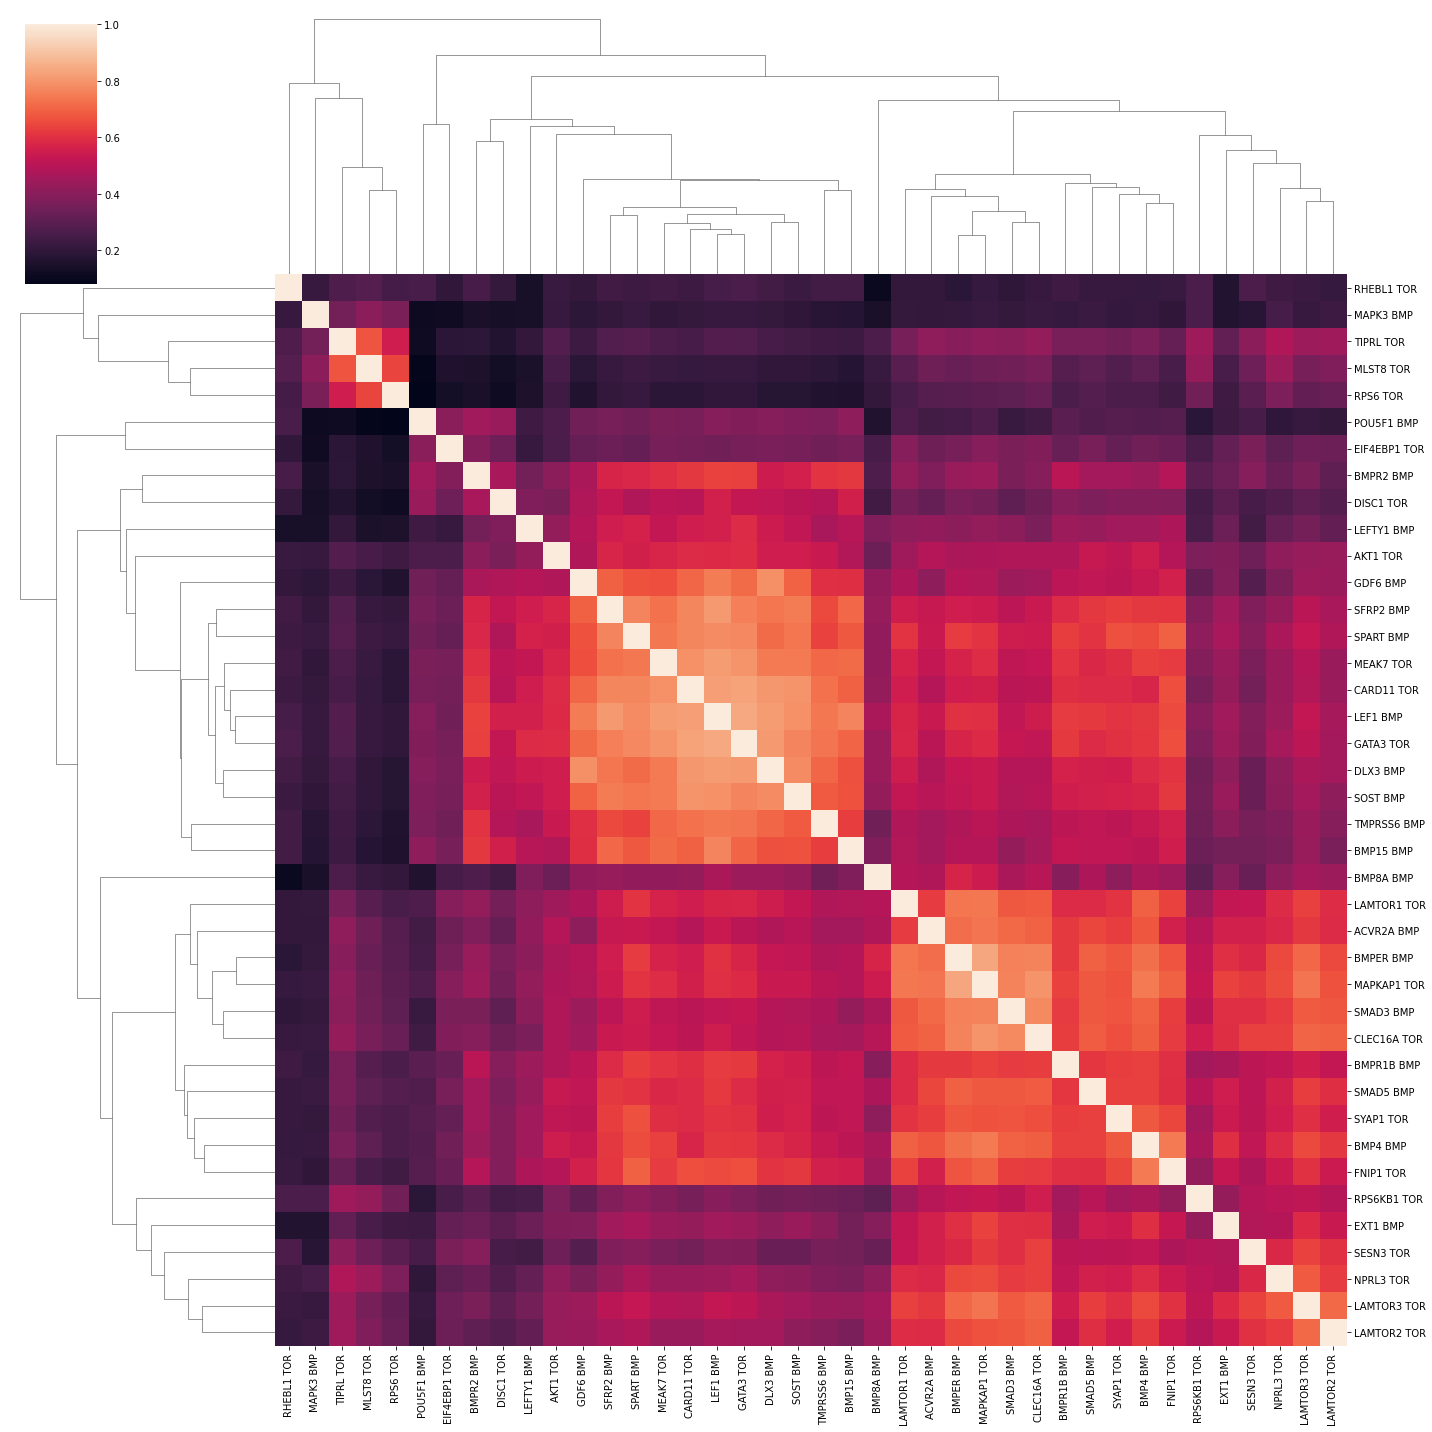

In [8]:
#here we directly establish the distance matrix between all profiles
from scipy.spatial.distance import cdist

#let's generate a distance kernel with a distance metric of our choice
distmat = cdist(orthosdf.to_numpy(), orthosdf.to_numpy() , metric = metrics[2])
sns.clustermap( 1-distmat , metric= metrics[0] , method=methods[1] , col_cluster=True, row_cluster= True, yticklabels = orthosdf.index , xticklabels = orthosdf.index , figsize = (20, 20))


In [9]:
#let's use independent analysis to comfirm 
#we need the BGee cross reference for our genes and some network data from string

qlist = { query['Entry Name']:query['Bgee'].replace(';','') for index,query in queries[['Entry Name','Bgee']].iterrows() if query['Bgee'] is not np.nan }
qlists = {'HUMAN': qlist }

# now using some cross references to other organisms
xrefs = {}
#we're going to grab the ensemble IDs for the orthologues from a few species also present in the Bgee dataset
#Bgee species are listed here https://bgee.org
#species information for OMA is available at https://omabrowser.org/All/oma-species.txt
#Ive selected some interesting species that are in both
species = [ 'DROME','CAEEL' , 'DANRE' , 'MOUSE' , 'PIGXX']
#... my cat would never forgive me if I didn't include them in the analysis
species +=['FELCA']

#retrieve the uniprot xrefs for each of the sequences
allnames = {}
taxmap = {'HUMAN':9606}

for q in orthologs:
    for o in orthologs[q]:
        for spec in species:
            if spec not in xrefs:
                xrefs[spec] = {}
            
            if  o['omaid'][0:5] == spec:
                if spec not in taxmap:
                    taxmap[spec] = o['species']['taxon_id']
                xrefs[spec][o['omaid'] ] = c.entries.xrefs(o['omaid'])
                if 'UniProtKB/TrEMBL' in xrefs[spec][o['omaid'] ]:
                    names[ xrefs[spec][o['omaid']]['UniProtKB/TrEMBL'][0]] = names[q]
allnames.update(names)


for spec in species:
    #map everything to Bgee/ensembl gene IDs
    qlist = {}
    tryagain = []
    for entry in xrefs[spec]:
        if 'Bgee' in xrefs[spec][entry]  and 'UniProtKB/TrEMBL' in xrefs[spec][entry]:
            try:
                qlist.update({xrefs[spec][entry]['UniProtKB/TrEMBL'][0] : xrefs[spec][entry]['Bgee'][0].split('.')[0] })
            except IndexError:
                pass
        elif 'UniProtKB/TrEMBL' in xrefs[spec][entry]:
            tryagain.append(xrefs[spec][entry]['UniProtKB/TrEMBL'][0])
    print('qlist',qlist)
    print(tryagain)
    qlists[spec] = qlist
    

qlist {'P40417': 'FBgn0003256', 'P27091': 'FBgn0024234', 'Q9GYX3': 'FBgn0000395', 'Q95SI0': 'FBgn0003716', 'O96660': 'FBgn0025800', 'A0A4P7VB75': 'FBgn0265974', 'Q24229': 'FBgn0003169', 'Q9VEV4': 'FBgn0038427', 'B4F5L6': 'FBgn0264691', 'Q9VJD2': 'FBgn0032642', 'Q9V8I2': 'FBgn0034350', 'Q94533': 'FBgn0015806', 'Q9V719': 'FBgn0033935', 'B6IDY8': 'FBgn0036397', 'Q9W5W6': 'FBgn0031094', 'P29327': 'FBgn0261592', 'Q9XZ56': 'FBgn0261560', 'Q9VW73': 'FBgn0036932'}
['A0A0B4LGG4']
qlist {'Q02330': 'WBGene00004856', 'Q09488': 'WBGene00004860', 'Q9N4D6': 'WBGene00022279', 'Q95UF8': 'WBGene00001660', 'O17591': 'WBGene00007621', 'P91040': 'WBGene00015697', 'Q9N2U6': 'WBGene00022402', 'Q21694': 'WBGene00044281', 'X5LXA9': 'WBGene00018072', 'P34443': 'WBGene00010038', 'P34274': 'WBGene00022803', 'Q9NEN6': 'WBGene00004475'}
[]
qlist {'P85857': 'ENSDARG00000053479', 'B3DIP3': 'ENSDARG00000020057', 'O57574': 'ENSDARG00000019995', 'Q9W7E7': 'ENSDARG00000037238', 'F1R238': 'ENSDARG00000070050', 'Q7ZVK8': '

In [10]:
#Retrieving tissue specific expression for each of our genes using
#a sparql query for using lists of ensemble IDs on BGEE
from SPARQLWrapper import SPARQLWrapper , CSV
from io import StringIO

endpt = "https://bgee.org/sparql/"
sparql = SPARQLWrapper(endpt)

#here's the template sparql query we're going to be using
#we can add our gene IDs for each species

query = '''

PREFIX orth: <http://purl.org/net/orth#>
PREFIX genex: <http://purl.org/genex#>
PREFIX lscr: <http://purl.org/lscr#>
PREFIX gene: <http://purl.org/net/orth#Gene>
PREFIX obo: <http://purl.obolibrary.org/obo/>
SELECT DISTINCT ?anat ?anatName ?geneEns{{
    
    values  ?geneEns {{   {0}   }}
    ?gene genex:isExpressedIn ?anat .
    ?gene lscr:xrefEnsemblGene ?geneEns.
	?gene rdfs:label ?geneName .
	?anat rdfs:label ?anatName .
}}
'''

dfs = []
for species in qlists:
    print(qlists[species])
    #for each species in our queries
    #make a list of gene IDs
    
    pre = '<http://rdf.ebi.ac.uk/resource/ensembl/'
    suf = '>'
    ensemblelist = ''.join( [ pre + qlists[species][uniID]  + suf + ' ' for uniID in qlists[species] ] )
    #get the Bgee data
    print(ensemblelist)
    sparql.setQuery(query.format(ensemblelist))
    sparql.setReturnFormat(CSV)
    results = sparql.query().convert()
    #and make a dataframe for our returned results
    sub = pd.read_csv(StringIO(results.decode()) )
    #add which species the data came from to our dataframe columns
    sub['species'] = species
    sub['geneEns'] = sub['geneEns'].map(lambda x : x.split('/')[-1])
    
    #add the uniprot cannonical IDs into our dataframe as well
    sub['canonicalid'] = sub['geneEns'].map(dict(zip( qlists[species].values(), qlists[species].keys() )))
    #use uniprot IDs to map back to our original human gene names 
    sub['names'] =  sub['canonicalid'].map(names)
    dfs.append(sub)


#put everything into one big dataframe
expressionDF = pd.concat(dfs)


{'GDF6_HUMAN': 'ENSG00000156466', 'BMPR2_HUMAN': 'ENSG00000204217', 'BMP4_HUMAN': 'ENSG00000125378', 'SMAD5_HUMAN': 'ENSG00000113658', 'TMPS6_HUMAN': 'ENSG00000187045', 'SFRP2_HUMAN': 'ENSG00000145423', 'MK03_HUMAN': 'ENSG00000102882', 'BMP8A_HUMAN': 'ENSG00000183682', 'BMPER_HUMAN': 'ENSG00000164619', 'DLX3_HUMAN': 'ENSG00000064195', 'SPART_HUMAN': 'ENSG00000133104', 'SOST_HUMAN': 'ENSG00000167941', 'LFTY1_HUMAN': 'ENSG00000243709', 'BMR1B_HUMAN': 'ENSG00000138696', 'PO5F1_HUMAN': 'ENSG00000204531', 'LEF1_HUMAN': 'ENSG00000138795', 'SMAD3_HUMAN': 'ENSG00000166949', 'BMP15_HUMAN': 'ENSG00000130385', 'EXT1_HUMAN': 'ENSG00000182197', 'AVR2A_HUMAN': 'ENSG00000121989', 'SESN3_HUMAN': 'ENSG00000149212', 'CL16A_HUMAN': 'ENSG00000038532', 'SYAP1_HUMAN': 'ENSG00000169895', 'AKT1_HUMAN': 'ENSG00000142208', 'MEAK7_HUMAN': 'ENSG00000140950', 'DISC1_HUMAN': 'ENSG00000162946', 'CAR11_HUMAN': 'ENSG00000198286', 'LST8_HUMAN': 'ENSG00000167965', 'LTOR3_HUMAN': 'ENSG00000109270', 'LTOR2_HUMAN': 'ENSG00

HUMAN
                                            anat             anatName  \
0      http://purl.obolibrary.org/obo/CL_0000655     secondary oocyte   
1  http://purl.obolibrary.org/obo/UBERON_0000002       uterine cervix   
2  http://purl.obolibrary.org/obo/UBERON_0000004                 nose   
3  http://purl.obolibrary.org/obo/UBERON_0000006  islet of Langerhans   
4  http://purl.obolibrary.org/obo/UBERON_0000007      pituitary gland   

           geneEns species canonicalid     names  
0  ENSG00000137154   HUMAN   RS6_HUMAN  RPS6 TOR  
1  ENSG00000137154   HUMAN   RS6_HUMAN  RPS6 TOR  
2  ENSG00000137154   HUMAN   RS6_HUMAN  RPS6 TOR  
3  ENSG00000137154   HUMAN   RS6_HUMAN  RPS6 TOR  
4  ENSG00000137154   HUMAN   RS6_HUMAN  RPS6 TOR  


/home/cactuskid/miniconda3/envs/f1000/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


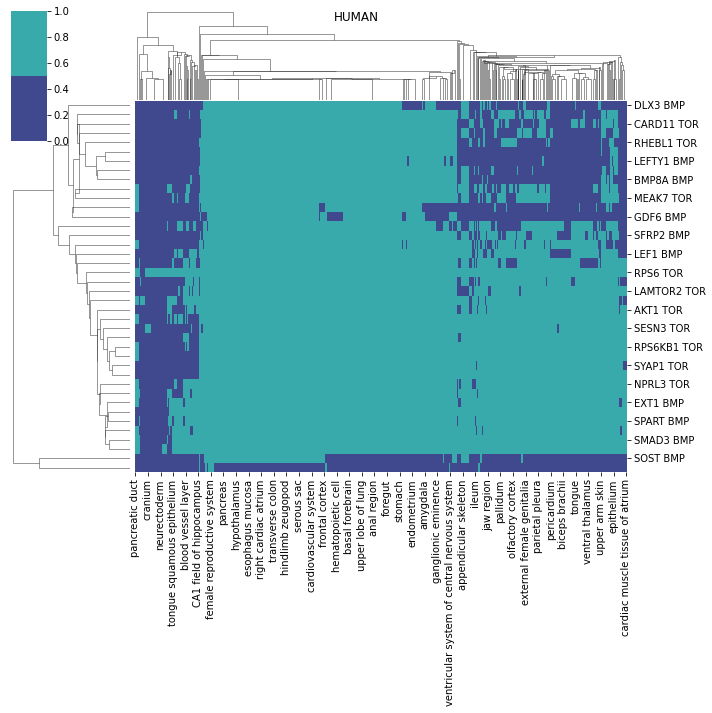

/tmp/ipykernel_20467/605296997.py:35: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sub_orthodf = orthosdf.loc[selected]


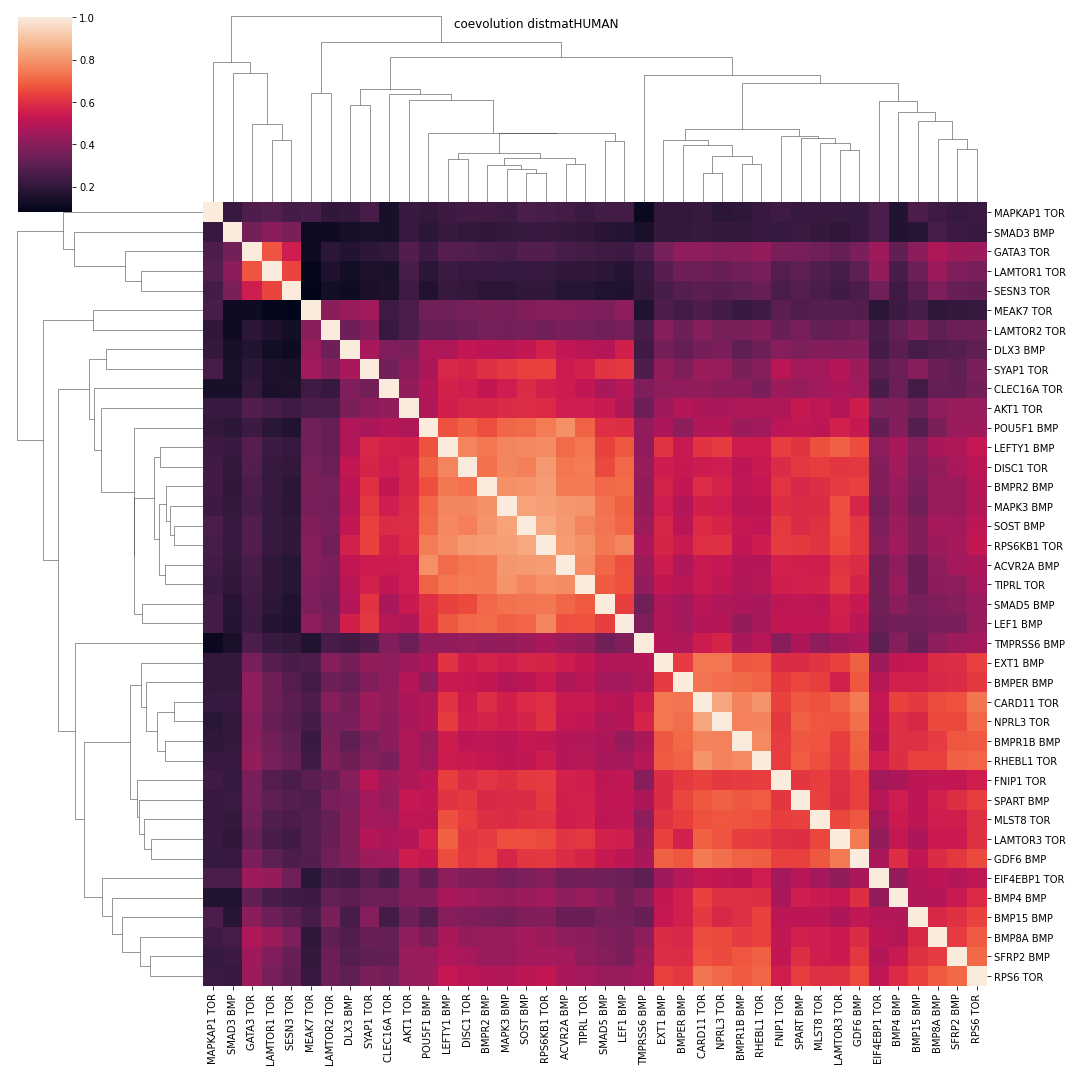

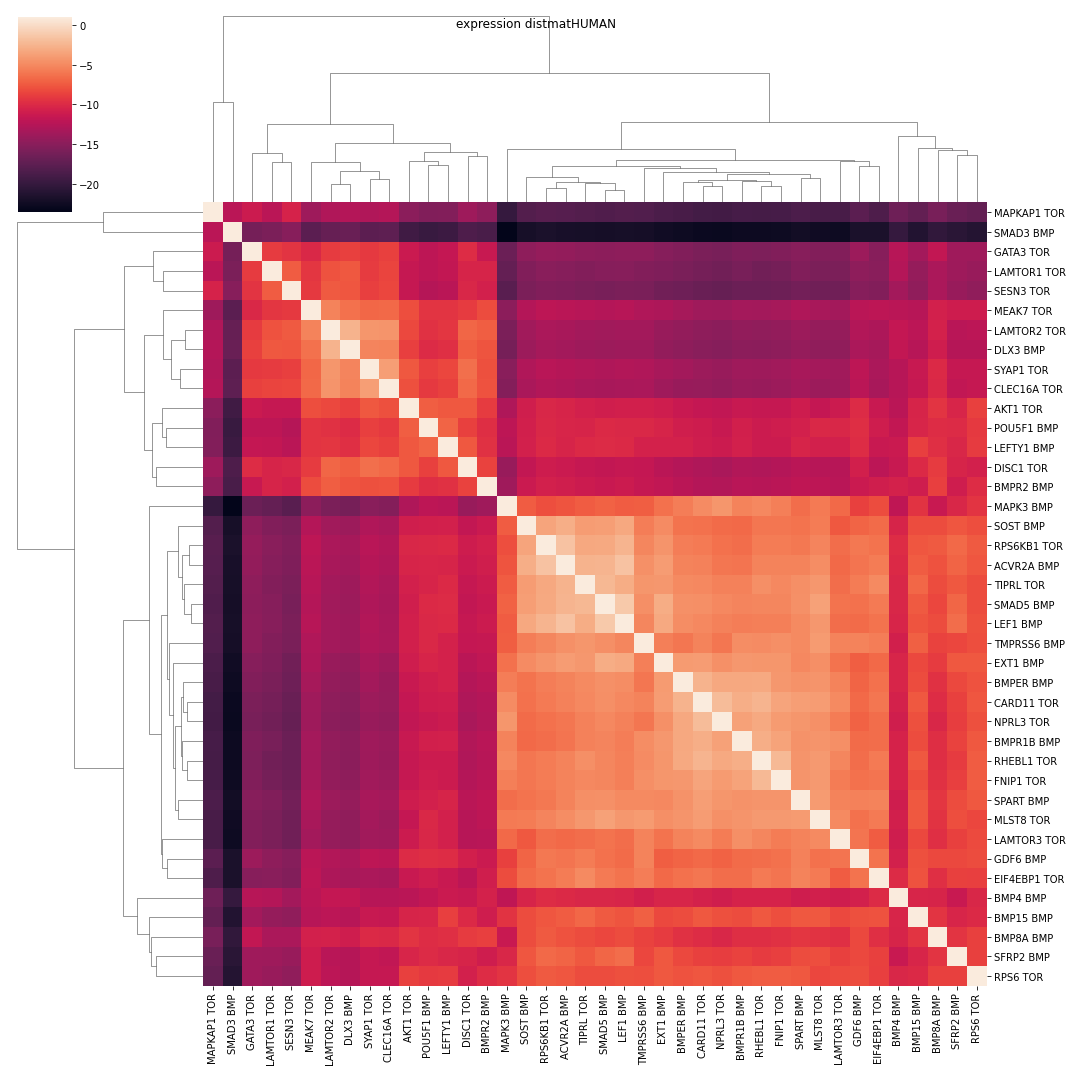

 do our matrices match from one approach to the other? 


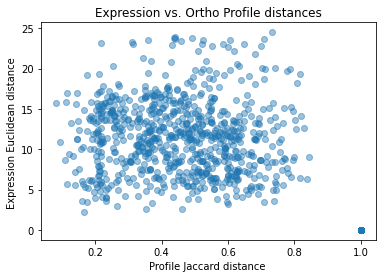

Pearson:PearsonRResult(statistic=0.1937384770708341, pvalue=5.381246191077141e-15)
DROME
                                            anat          anatName  \
0      http://purl.obolibrary.org/obo/CL_0000655  secondary oocyte   
1  http://purl.obolibrary.org/obo/UBERON_0000033              head   
2  http://purl.obolibrary.org/obo/UBERON_0000033              head   
3  http://purl.obolibrary.org/obo/UBERON_0000323       late embryo   
4  http://purl.obolibrary.org/obo/UBERON_0000473            testis   

       geneEns species canonicalid       names  
0  FBgn0003169   DROME      Q24229  ACVR2A BMP  
1  FBgn0000395   DROME      Q9GYX3   BMPER BMP  
2  FBgn0003169   DROME      Q24229  ACVR2A BMP  
3  FBgn0003169   DROME      Q24229  ACVR2A BMP  
4  FBgn0000395   DROME      Q9GYX3   BMPER BMP  


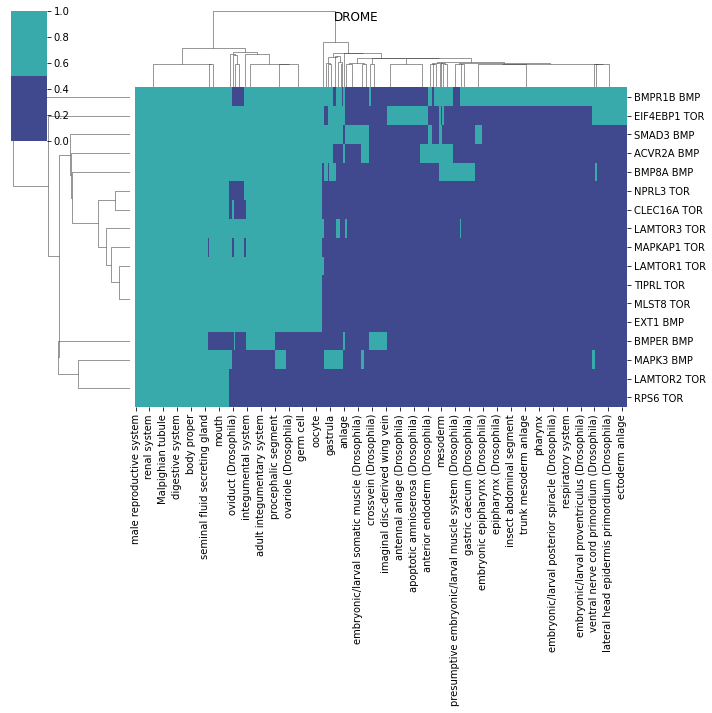

/tmp/ipykernel_20467/605296997.py:35: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sub_orthodf = orthosdf.loc[selected]


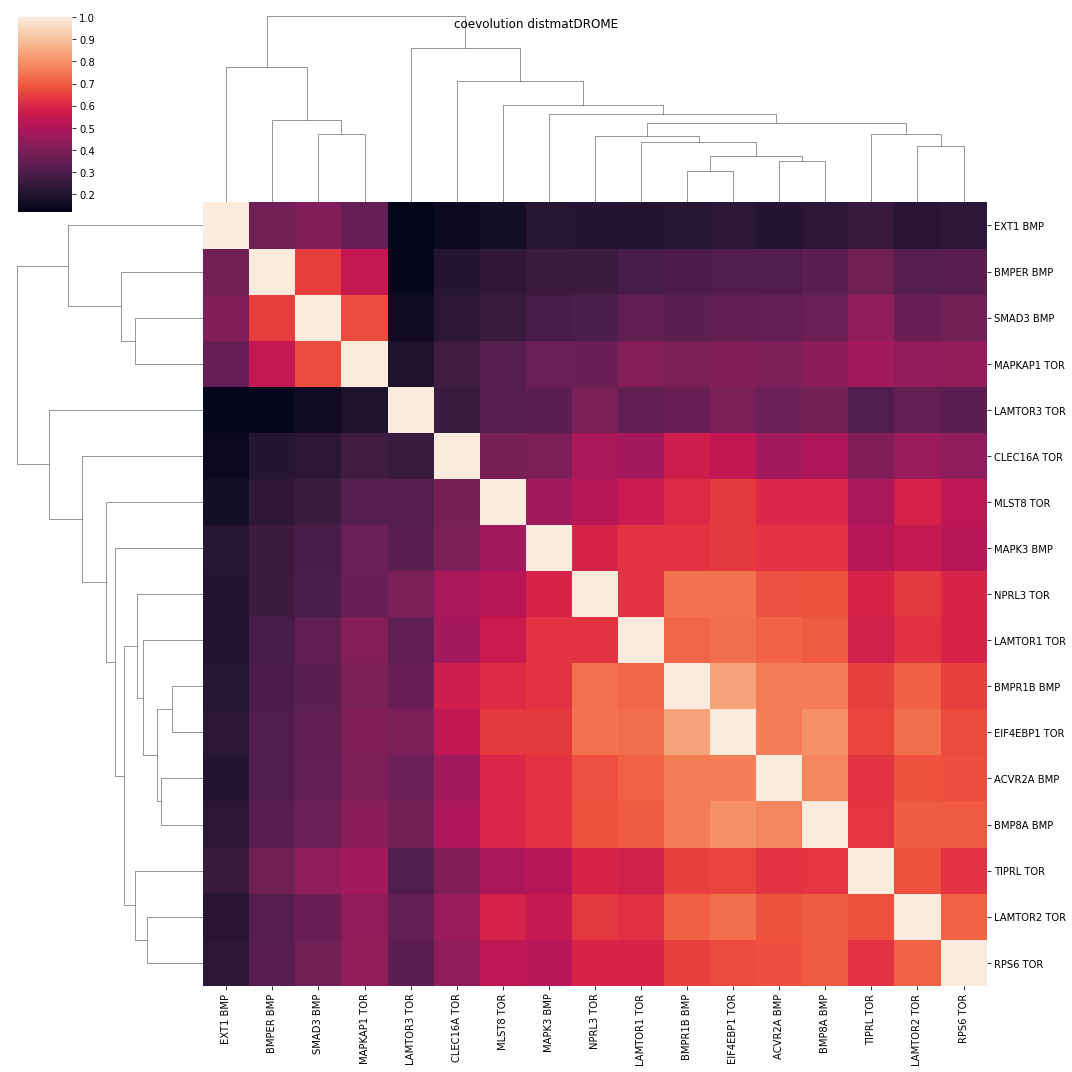

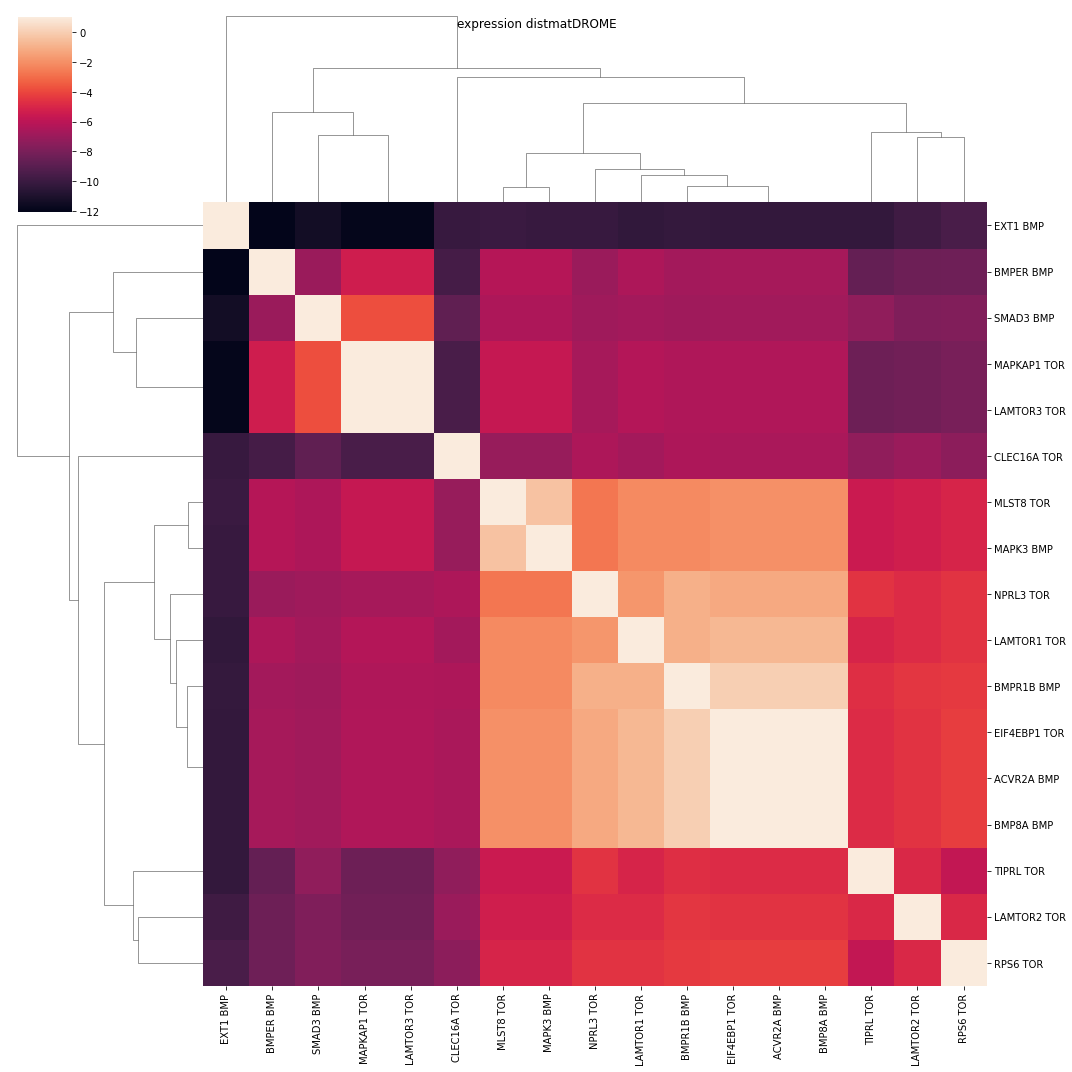

 do our matrices match from one approach to the other? 


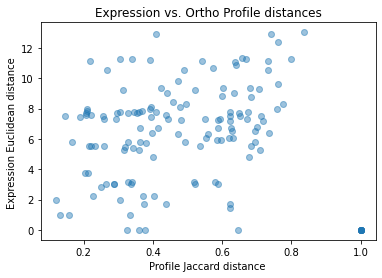

Pearson:PearsonRResult(statistic=0.02830986248565069, pvalue=0.631740886731916)
CAEEL
                                            anat   anatName         geneEns  \
0  http://purl.obolibrary.org/obo/UBERON_0000033       head  WBGene00004860   
1  http://purl.obolibrary.org/obo/UBERON_0000160  intestine  WBGene00004860   
2  http://purl.obolibrary.org/obo/UBERON_0000922     embryo  WBGene00001660   
3  http://purl.obolibrary.org/obo/UBERON_0000922     embryo  WBGene00004475   
4  http://purl.obolibrary.org/obo/UBERON_0000922     embryo  WBGene00004856   

  species canonicalid        names  
0   CAEEL      Q09488   BMPR1B BMP  
1   CAEEL      Q09488   BMPR1B BMP  
2   CAEEL      Q95UF8  CLEC16A TOR  
3   CAEEL      Q9NEN6     RPS6 TOR  
4   CAEEL      Q02330    SMAD5 BMP  


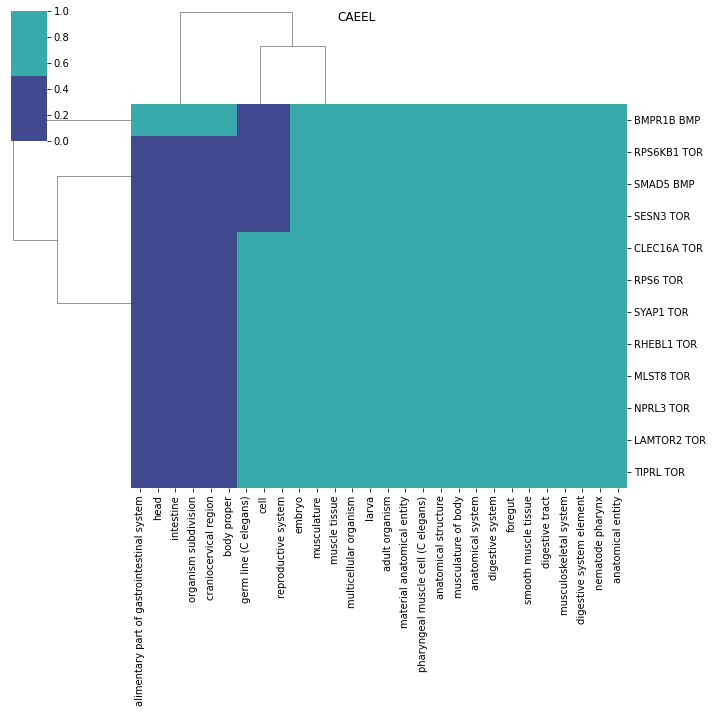

/tmp/ipykernel_20467/605296997.py:35: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sub_orthodf = orthosdf.loc[selected]


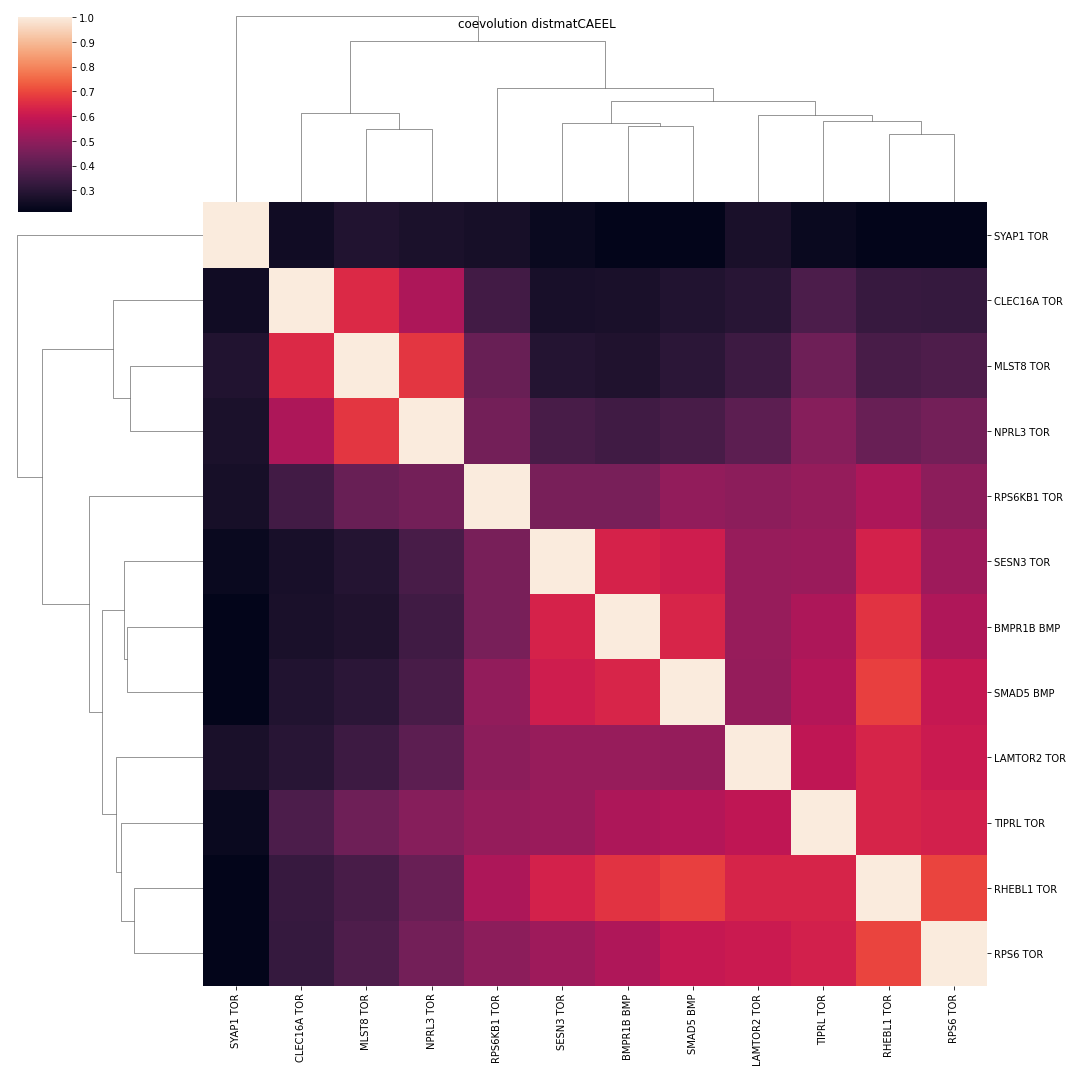

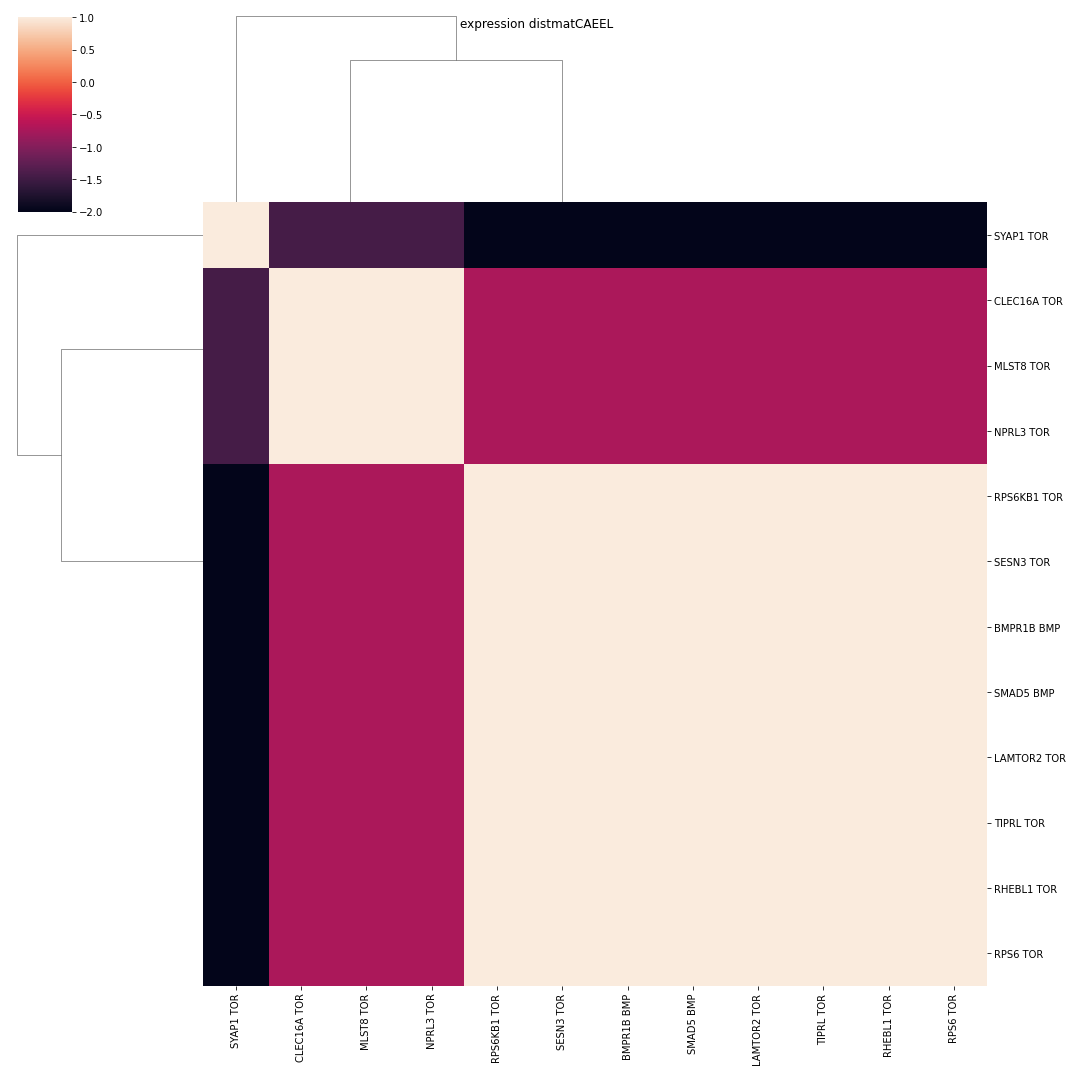

 do our matrices match from one approach to the other? 


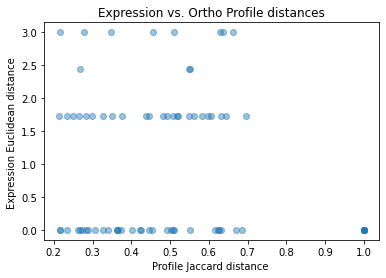

Pearson:PearsonRResult(statistic=0.12492149012803688, pvalue=0.13574024512850486)
DANRE
                                            anat         anatName  \
0  http://purl.obolibrary.org/obo/UBERON_0000014     zone of skin   
1  http://purl.obolibrary.org/obo/UBERON_0000019  camera-type eye   
2  http://purl.obolibrary.org/obo/UBERON_0000033             head   
3  http://purl.obolibrary.org/obo/UBERON_0000127   facial nucleus   
4  http://purl.obolibrary.org/obo/UBERON_0000160        intestine   

              geneEns species canonicalid      names  
0  ENSDARG00000016526   DANRE      B3DGG5  GATA3 TOR  
1  ENSDARG00000016526   DANRE      B3DGG5  GATA3 TOR  
2  ENSDARG00000016526   DANRE      B3DGG5  GATA3 TOR  
3  ENSDARG00000016526   DANRE      B3DGG5  GATA3 TOR  
4  ENSDARG00000016526   DANRE      B3DGG5  GATA3 TOR  


/home/cactuskid/miniconda3/envs/f1000/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


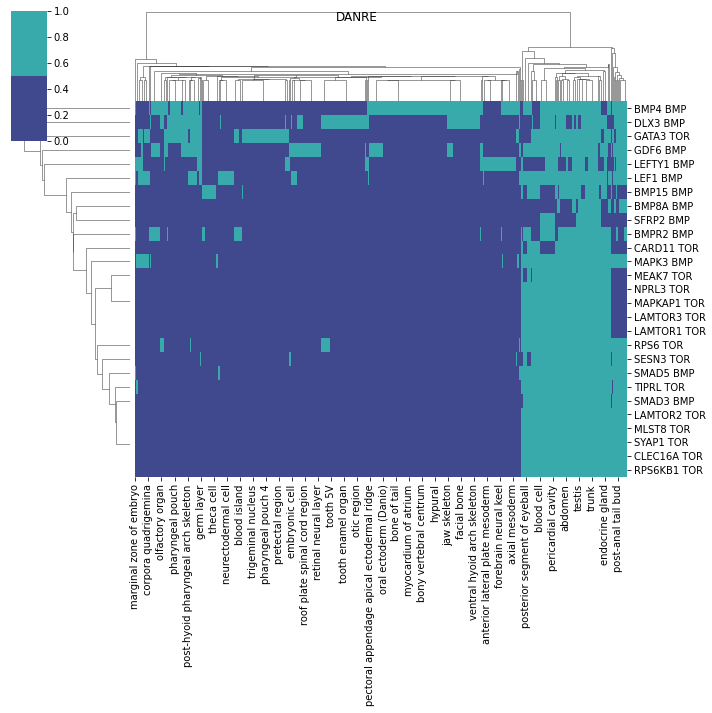

/tmp/ipykernel_20467/605296997.py:35: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sub_orthodf = orthosdf.loc[selected]


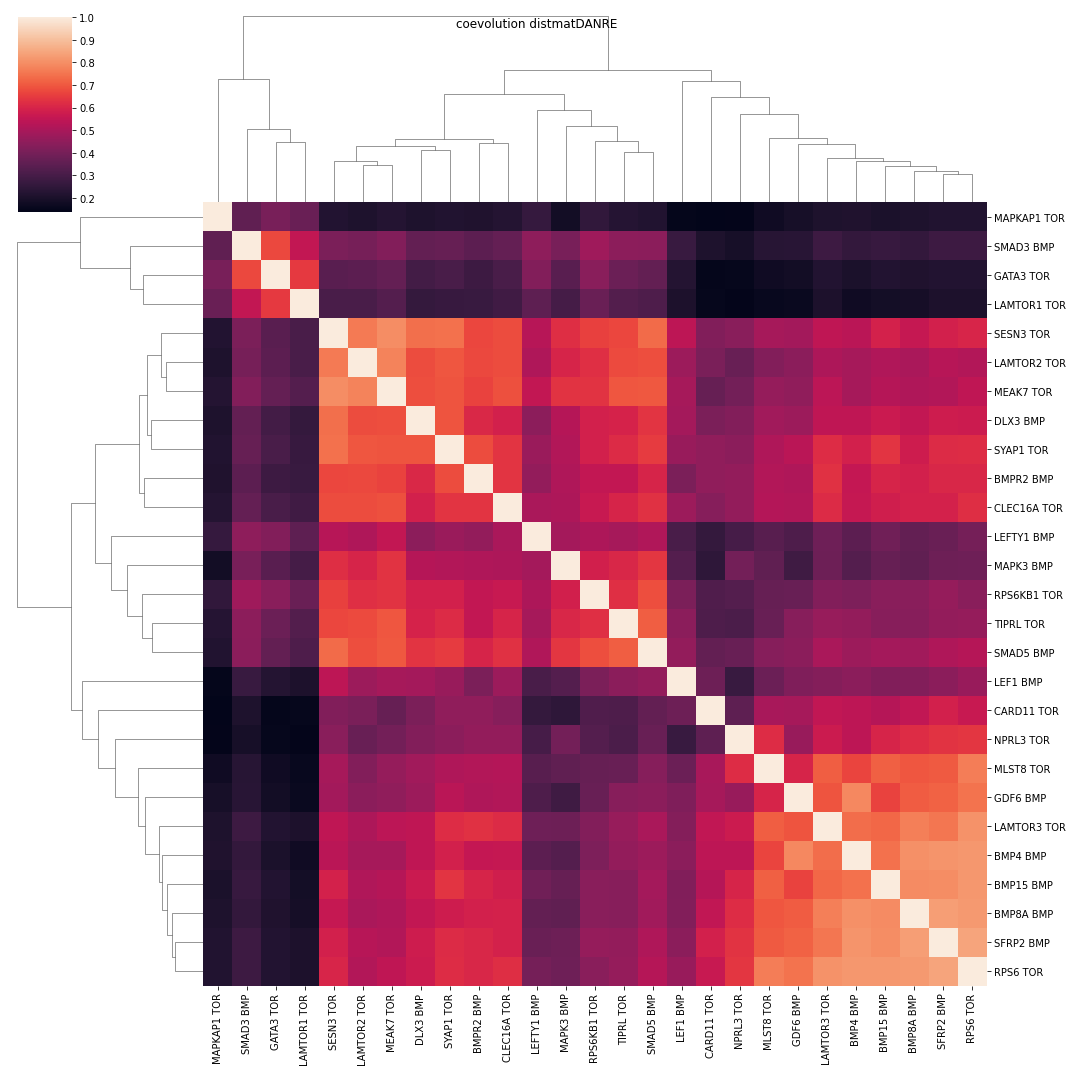

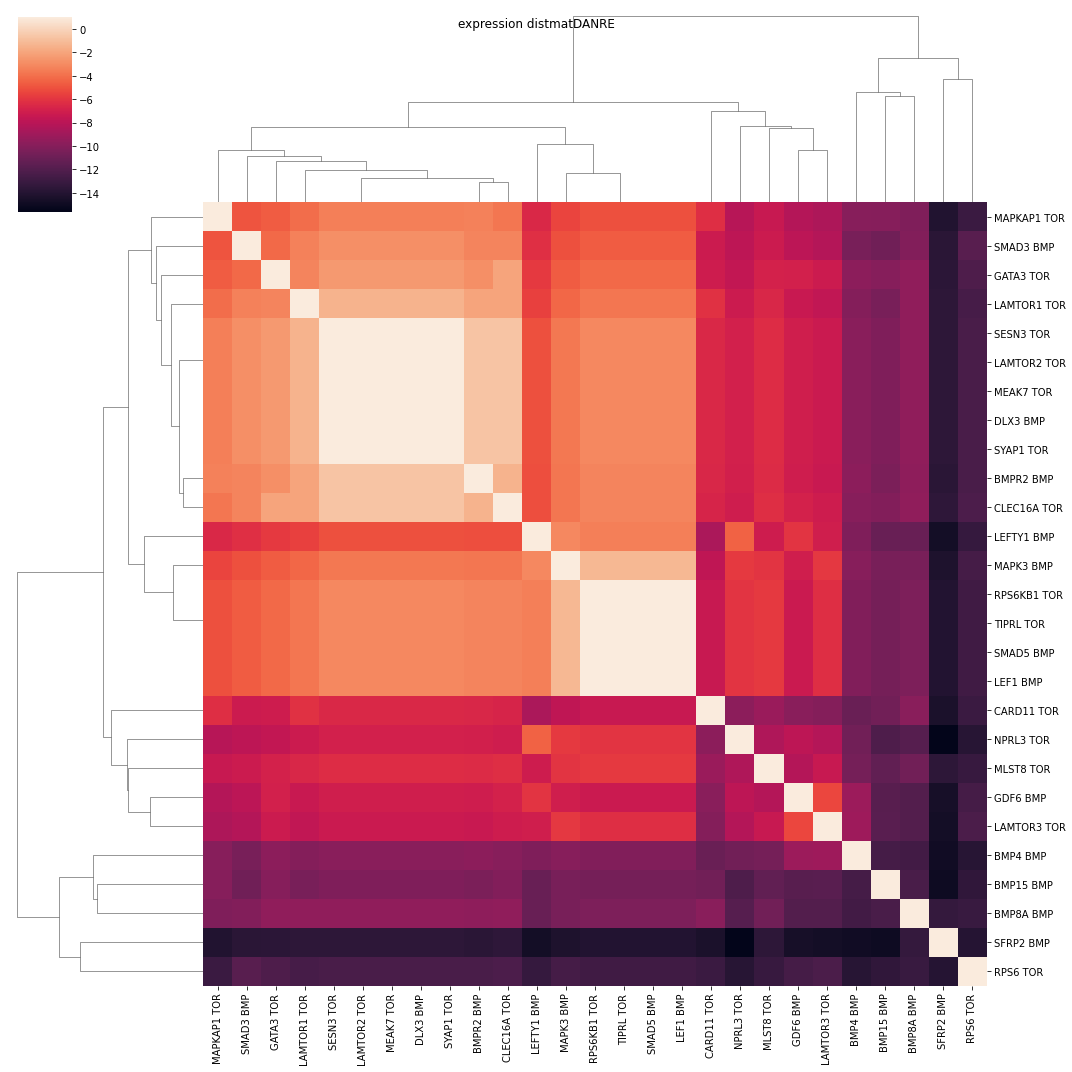

 do our matrices match from one approach to the other? 


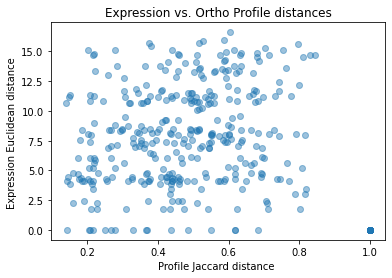

Pearson:PearsonRResult(statistic=0.009072109150476522, pvalue=0.8068190985605549)
MOUSE
                                        anat  \
0  http://purl.obolibrary.org/obo/CL_0000365   
1  http://purl.obolibrary.org/obo/CL_0000654   
2  http://purl.obolibrary.org/obo/CL_0000655   
3  http://purl.obolibrary.org/obo/CL_0000711   
4  http://purl.obolibrary.org/obo/CL_0002138   

                               anatName             geneEns species  \
0                         animal zygote  ENSMUSG00000024142   MOUSE   
1                        primary oocyte  ENSMUSG00000024142   MOUSE   
2                      secondary oocyte  ENSMUSG00000024142   MOUSE   
3                          cumulus cell  ENSMUSG00000024142   MOUSE   
4  endothelial cell of lymphatic vessel  ENSMUSG00000024142   MOUSE   

  canonicalid      names  
0      Q9DCJ1  MLST8 TOR  
1      Q9DCJ1  MLST8 TOR  
2      Q9DCJ1  MLST8 TOR  
3      Q9DCJ1  MLST8 TOR  
4      Q9DCJ1  MLST8 TOR  


/home/cactuskid/miniconda3/envs/f1000/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


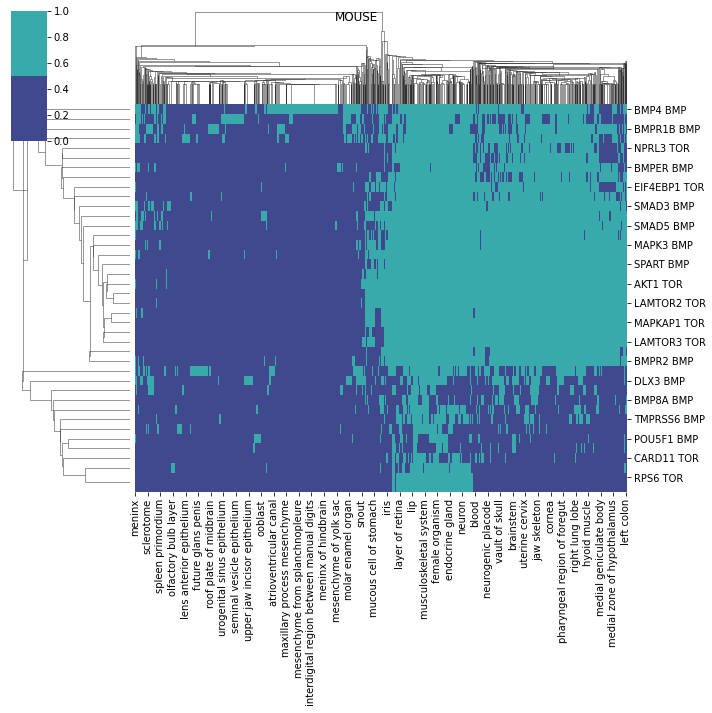

/tmp/ipykernel_20467/605296997.py:35: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sub_orthodf = orthosdf.loc[selected]


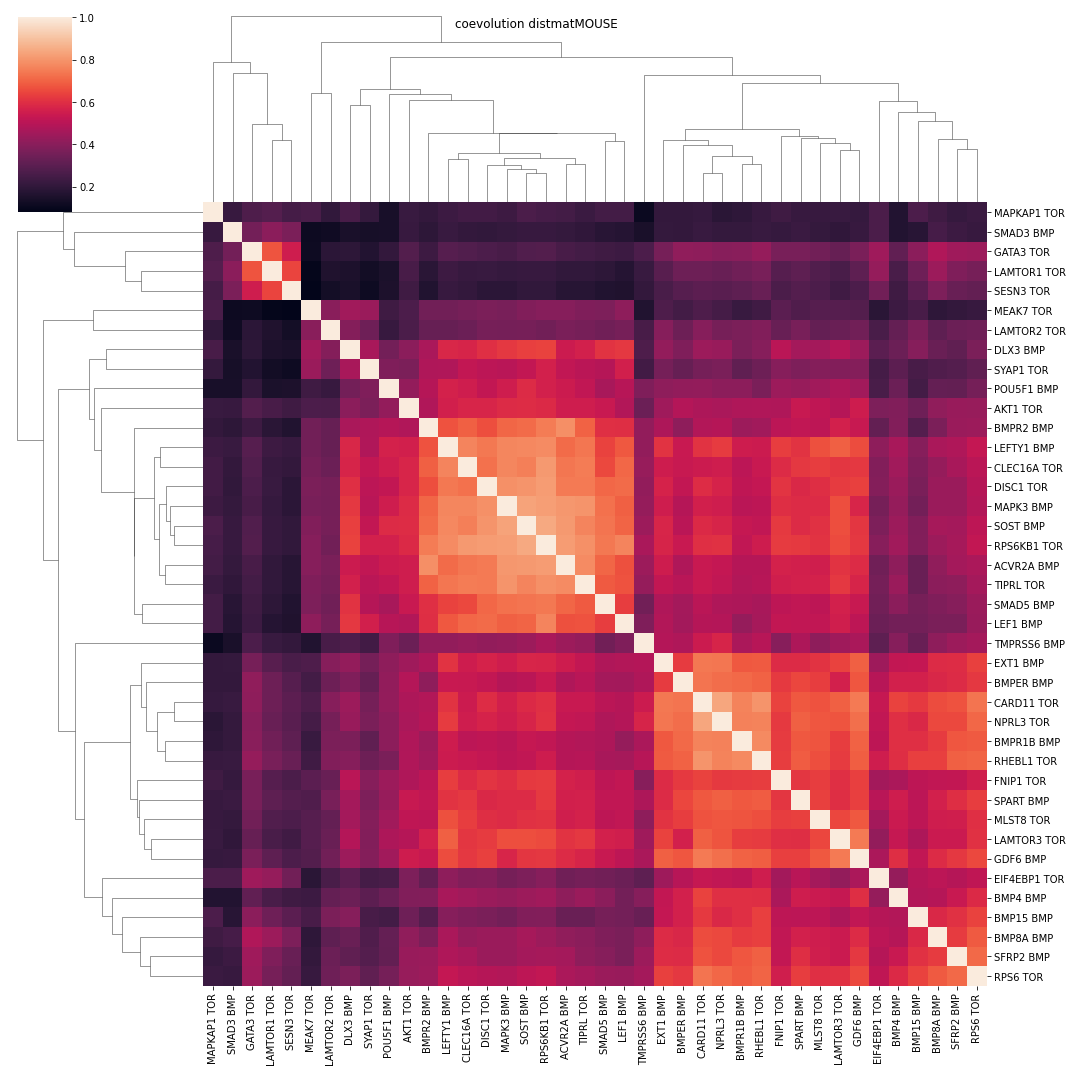

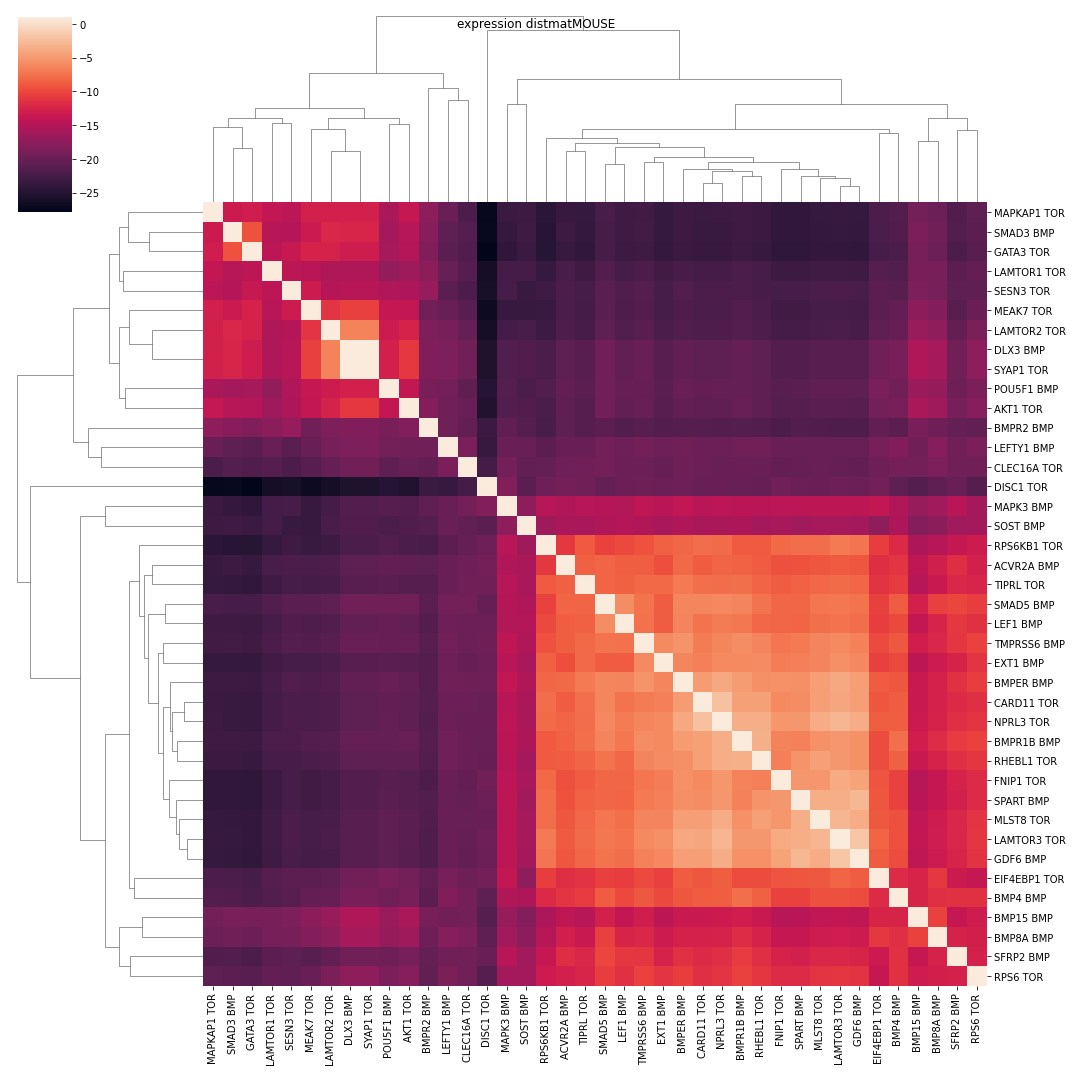

 do our matrices match from one approach to the other? 


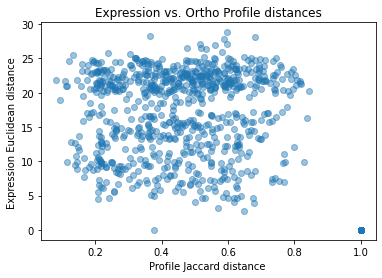

Pearson:PearsonRResult(statistic=0.12418819686810499, pvalue=6.262330799823528e-07)
PIGXX
                                            anat                anatName  \
0  http://purl.obolibrary.org/obo/UBERON_0000082  adult mammalian kidney   
1  http://purl.obolibrary.org/obo/UBERON_0000160               intestine   
2  http://purl.obolibrary.org/obo/UBERON_0000178                   blood   
3  http://purl.obolibrary.org/obo/UBERON_0000451       prefrontal cortex   
4  http://purl.obolibrary.org/obo/UBERON_0000473                  testis   

              geneEns species canonicalid       names  
0  ENSSSCG00000000186   PIGXX      F1SJ12  RHEBL1 TOR  
1  ENSSSCG00000000186   PIGXX      F1SJ12  RHEBL1 TOR  
2  ENSSSCG00000000186   PIGXX      F1SJ12  RHEBL1 TOR  
3  ENSSSCG00000000186   PIGXX      F1SJ12  RHEBL1 TOR  
4  ENSSSCG00000000186   PIGXX      F1SJ12  RHEBL1 TOR  


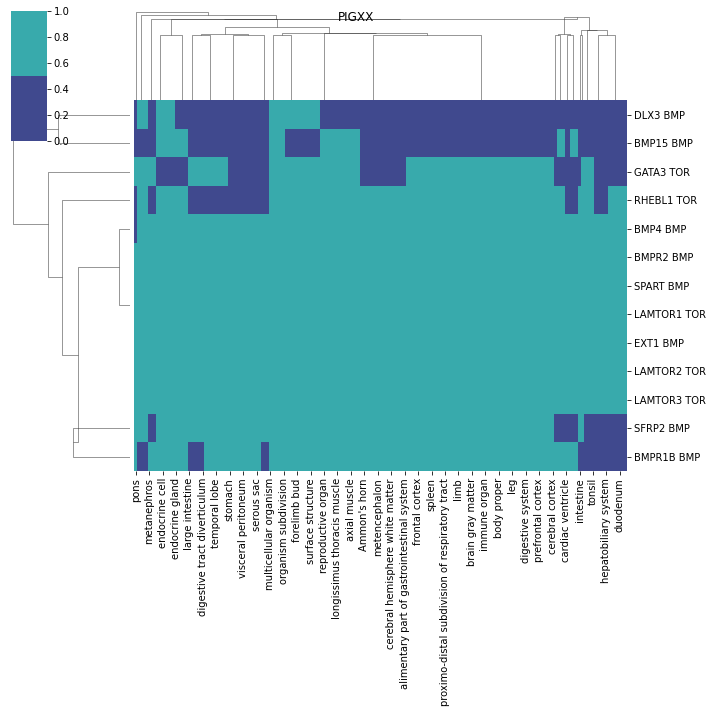

/tmp/ipykernel_20467/605296997.py:35: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sub_orthodf = orthosdf.loc[selected]


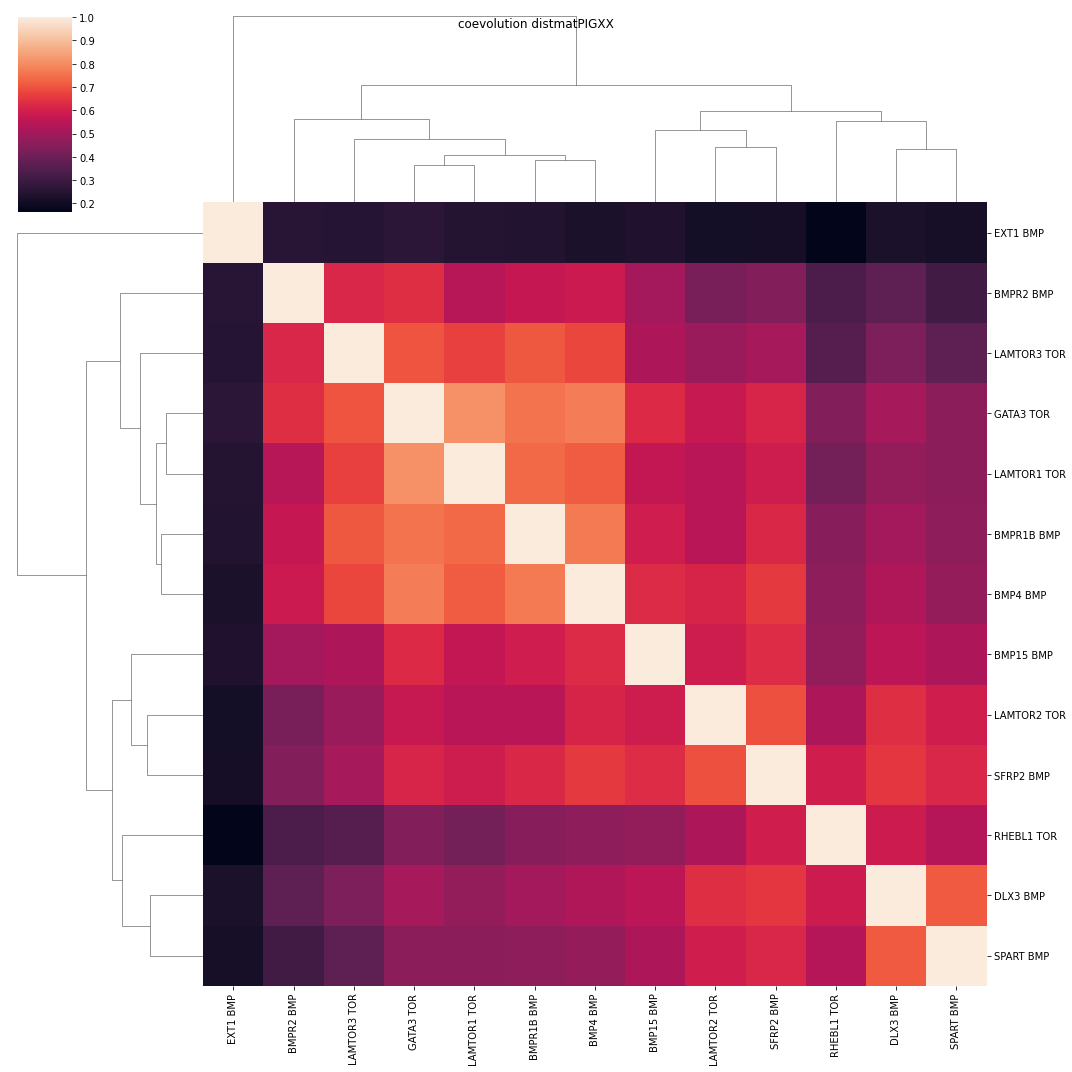

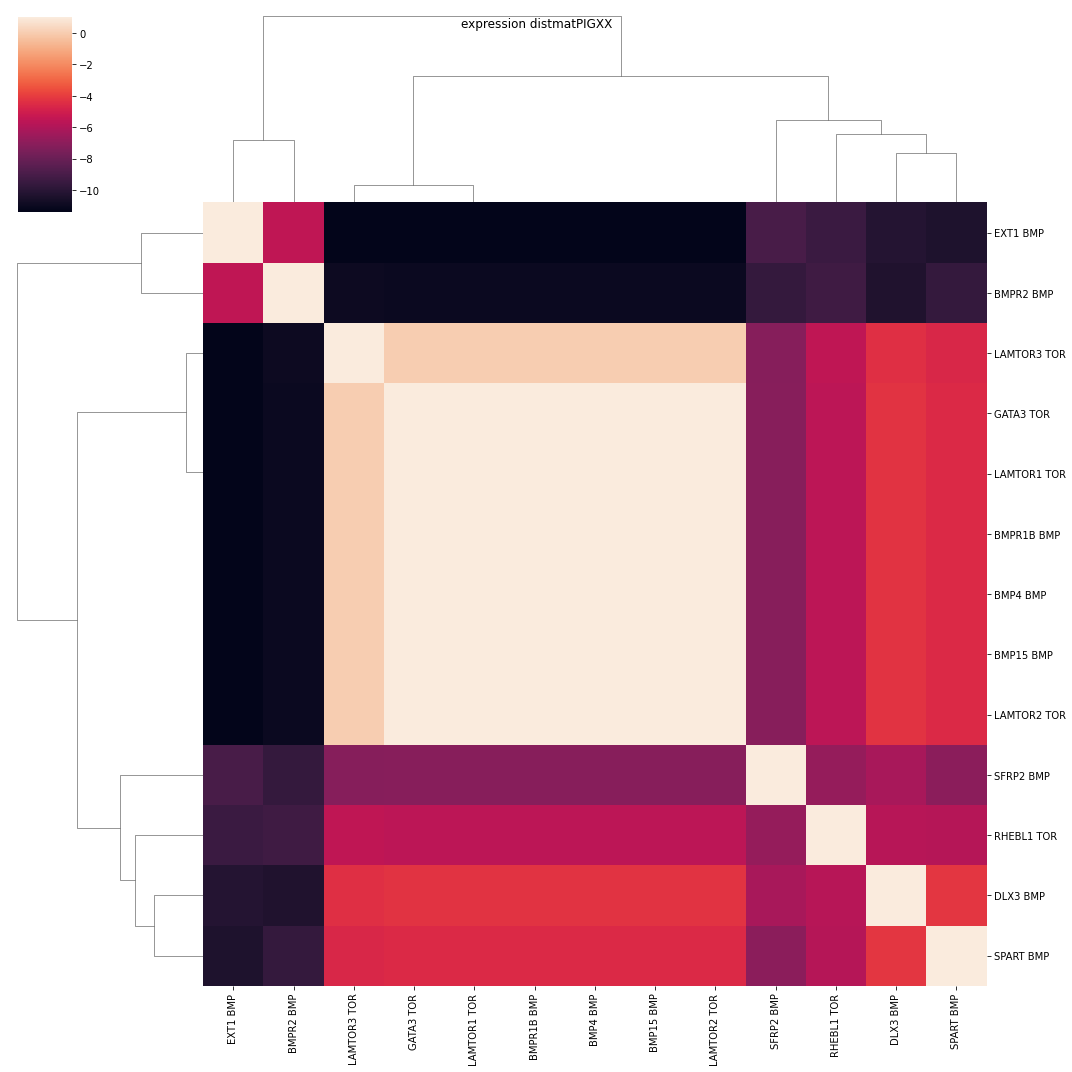

 do our matrices match from one approach to the other? 


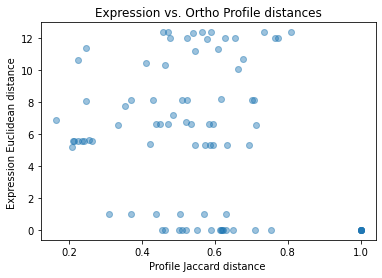

Pearson:PearsonRResult(statistic=0.2177750315146107, pvalue=0.00445115177379043)
FELCA
                                            anat         anatName  \
0  http://purl.obolibrary.org/obo/UBERON_0000014     zone of skin   
1  http://purl.obolibrary.org/obo/UBERON_0000014     zone of skin   
2  http://purl.obolibrary.org/obo/UBERON_0000019  camera-type eye   
3  http://purl.obolibrary.org/obo/UBERON_0000019  camera-type eye   
4  http://purl.obolibrary.org/obo/UBERON_0000033             head   

              geneEns species canonicalid       names  
0  ENSFCAG00000000096   FELCA      M3VU36  RHEBL1 TOR  
1  ENSFCAG00000000789   FELCA  A0A5F5XTX3   BMPER BMP  
2  ENSFCAG00000000096   FELCA      M3VU36  RHEBL1 TOR  
3  ENSFCAG00000000789   FELCA  A0A5F5XTX3   BMPER BMP  
4  ENSFCAG00000000096   FELCA      M3VU36  RHEBL1 TOR  


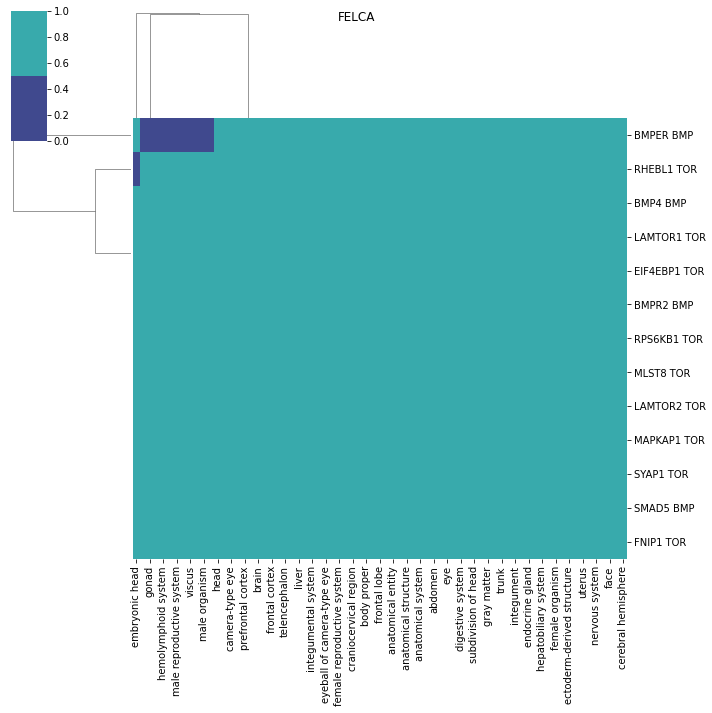

/tmp/ipykernel_20467/605296997.py:35: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sub_orthodf = orthosdf.loc[selected]


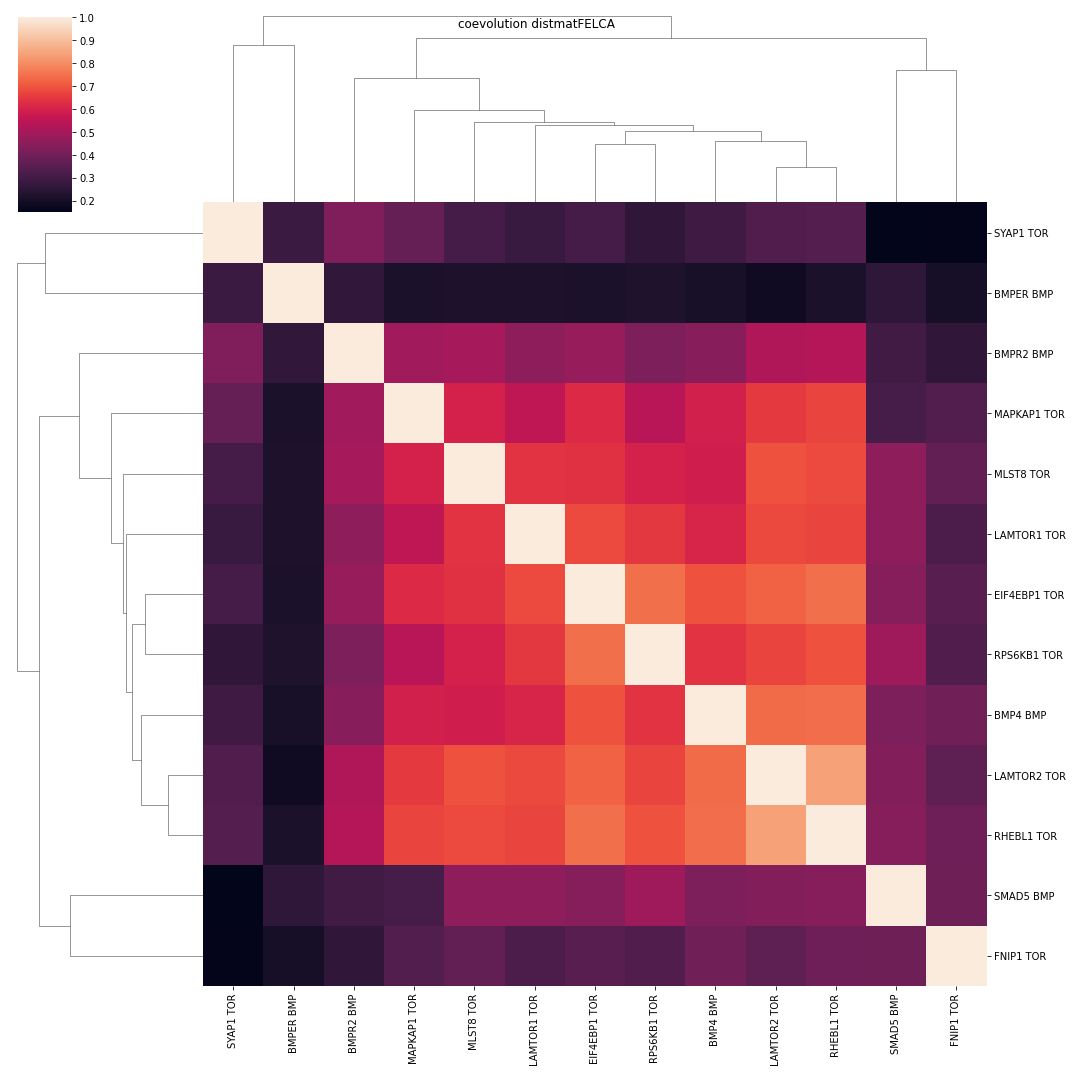

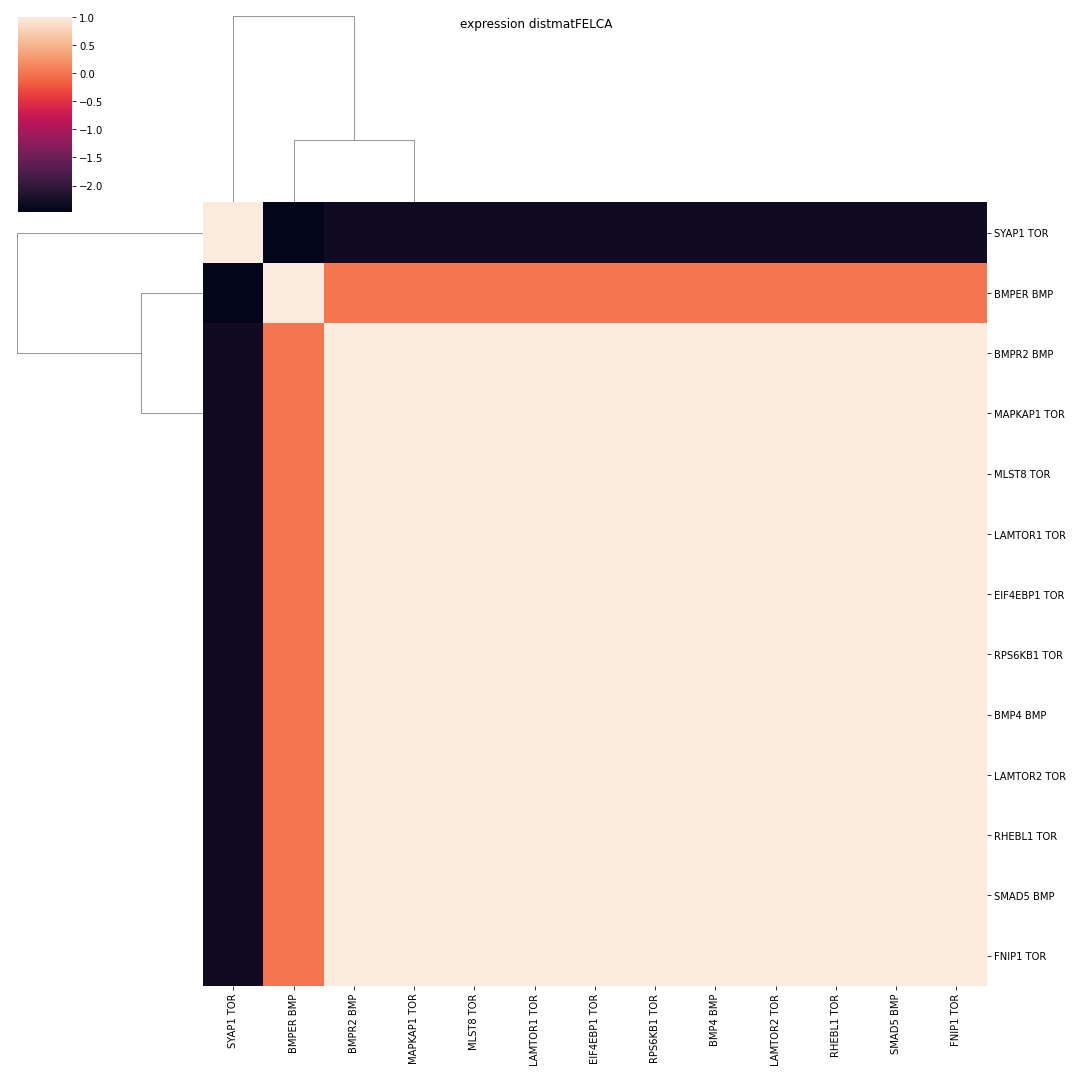

 do our matrices match from one approach to the other? 


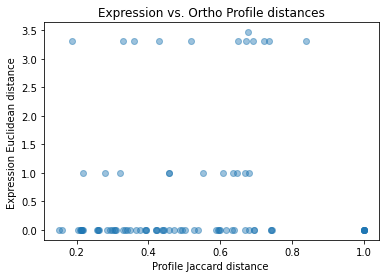

Pearson:PearsonRResult(statistic=-0.12978654411711188, pvalue=0.09260298488283064)


In [11]:
#now for the results of our efforts!
from scipy.stats import pearsonr , spearmanr


expression_mats = {}
expression_rowmappers = {}

for spec in expressionDF.species.unique():
    selected = set()
    #look at the clustering of the expression data for each species
    print(spec)
    sub = expressionDF[expressionDF.species == spec]
    #we can create another dataframe which shows the genes expressed in each tissue
    print(sub.head())
    #each row is a gene
    #each column is a tissue
    #we only consider tissues where at least one of the genes is expressed
    rows = list(sub.names.unique())
    columns = list(sub.anatName.unique())
    expr_mat = {r :{ c : 0 for c in columns  } for r in rows }
    #lets set all of the places where each gene is expressed to 1
    for i,r in sub.iterrows():
        selected.add(r.names)
        expr_mat[r.names][r.anatName] = 1
    #and transform everything into a dataframe
    expr_mat = pd.DataFrame.from_dict( expr_mat , orient='index' )
    #generate a clustered heatmap figure
    #to show similarity in expression patterns across tissues
    g = sns.clustermap( expr_mat , metric= metrics[0] , method=methods[2] , col_cluster=True, row_cluster= True , cmap = sns.color_palette("mako", 2))
    g.fig.suptitle(spec)
    g.savefig( spec+'expcluster.svg')
    plt.show()
    
    #comparing the phylogenetic profile distmat
    sub_orthodf = orthosdf.loc[selected]
    distmat_ortho = cdist(sub_orthodf.to_numpy(), sub_orthodf.to_numpy() , metric = metrics[2])
    g = sns.clustermap( 1-distmat_ortho , metric= metrics[0] , method=methods[1] , rasterized=True, col_cluster=True, row_cluster= True, yticklabels = selected , xticklabels = selected , figsize = (15, 15)  )
    g.fig.suptitle( 'coevolution distmat' + spec) 
    plt.show()
    
    #with the expression profile distmat
    distmat_expr = cdist(expr_mat.to_numpy(), expr_mat.to_numpy() , metric = metrics[0])
    g = sns.clustermap( 1-distmat_expr , metric= metrics[0] , method=methods[1] , col_cluster=True,rasterized=True,  row_cluster= True, yticklabels = selected, xticklabels =selected , figsize = (15, 15) )
    g.fig.suptitle( 'expression distmat' + spec ) 
    plt.show()
    
    expression_mats[spec] = distmat_expr
    expression_rowmappers[spec] = selected
    
    #verify if expression and phylogenetic profile distances are correlated.
    print( ' do our matrices match from one approach to the other? ')
    plt.title( 'Expression vs. Ortho Profile distances')
    plt.xlabel( 'Profile Jaccard distance ')
    plt.ylabel( 'Expression Euclidean distance ')
    plt.scatter(1-distmat_ortho.ravel() , distmat_expr.ravel() , alpha= .25)
    plt.show()
    print( 'Pearson:'+ str( pearsonr( 1-distmat_ortho.ravel() , 1-distmat_expr.ravel() )  ) ) 
    

In [12]:
#pretty good matches in the cases where there is good resolution in the tissues
#It looks like there is coevolution and coexpression signal within each network
#now we can compare the networks generated with each approach to string.
#mtor and bmp are well studied pathways so they should have experimental
#and literature evidence in their String data

In [13]:
#her are some function adapted from the string api reference https://string-db.org/help/api/
#we can map to string identifiers and pull down pairwise interactions for our genes across species

import requests
from time import sleep
from io import StringIO

string_api_url = "https://version-11-5.string-db.org/api"
def map2string(my_genes, species):
    output_format = "tsv-no-header"
    method = "get_string_ids"

    params = {
        "identifiers" : "\r".join(my_genes), # your protein list
        "species" : species , # species NCBI identifier 
        "limit" : 1, # only one (best) identifier per input protein
        "echo_query" : 1, # see your input identifiers in the output
        "caller_identity" :  "OMA profiling ipython notebook"  # your app name
    }
    request_url = "/".join([string_api_url, output_format, method])
    results = requests.post(request_url, data=params)
    mapper = {}
    for line in results.text.strip().split("\n"):
        l = line.split("\t")
        input_identifier, string_identifier = l[0], l[2]
        #print("Input:", input_identifier, "STRING:", string_identifier, sep="\t")
        mapper[string_identifier]= input_identifier
    return mapper

def get_string_net(my_genes , species, output_format = 'tsv'):
    sleep(1)
    method = "network"    
    request_url = "/".join([string_api_url, output_format, method])
    params = {
        "identifiers" : "%0d".join(my_genes), # your protein
        "species" : species, # species NCBI identifier 

        "caller_identity" : "OMA profiling ipython notebook" # your app name
    }
    response = requests.post(request_url, data=params).text
    return pd.read_table(StringIO(response))


In [14]:
import networkx as nx

#Lets zoom in on the TOR pathway for this final step and compare our coexpression and coevolution
#graphs to the interactions found in databases, interaction experiments and the literature


Graph with 20 nodes and 190 edges


HUMAN {'GDF6_HUMAN': 'ENSG00000156466', 'BMPR2_HUMAN': 'ENSG00000204217', 'BMP4_HUMAN': 'ENSG00000125378', 'SMAD5_HUMAN': 'ENSG00000113658', 'TMPS6_HUMAN': 'ENSG00000187045', 'SFRP2_HUMAN': 'ENSG00000145423', 'MK03_HUMAN': 'ENSG00000102882', 'BMP8A_HUMAN': 'ENSG00000183682', 'BMPER_HUMAN': 'ENSG00000164619', 'DLX3_HUMAN': 'ENSG00000064195', 'SPART_HUMAN': 'ENSG00000133104', 'SOST_HUMAN': 'ENSG00000167941', 'LFTY1_HUMAN': 'ENSG00000243709', 'BMR1B_HUMAN': 'ENSG00000138696', 'PO5F1_HUMAN': 'ENSG00000204531', 'LEF1_HUMAN': 'ENSG00000138795', 'SMAD3_HUMAN': 'ENSG00000166949', 'BMP15_HUMAN': 'ENSG00000130385', 'EXT1_HUMAN': 'ENSG00000182197', 'AVR2A_HUMAN': 'ENSG00000121989', 'SESN3_HUMAN': 'ENSG00000149212', 'CL16A_HUMAN': 'ENSG00000038532', 'SYAP1_HUMAN': 'ENSG00000169895', 'AKT1_HUMAN': 'ENSG00000142208', 'MEAK7_HUMAN': 'ENSG00000140950', 'DISC1_HUMAN': 'ENSG00000162946', 'CAR11_HUMAN': 'ENSG00000198286', 'LST8_HUMAN': 'ENSG00000167965', 'LTOR3_HUMAN': 'ENSG00000109270', 'LTOR2_HUMAN': '

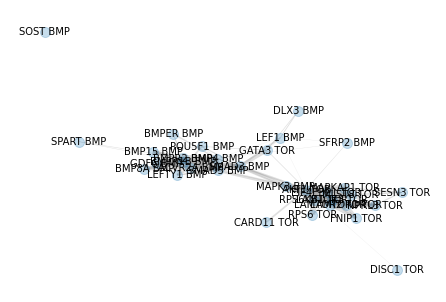

DROME {'P40417': 'FBgn0003256', 'P27091': 'FBgn0024234', 'Q9GYX3': 'FBgn0000395', 'Q95SI0': 'FBgn0003716', 'O96660': 'FBgn0025800', 'A0A4P7VB75': 'FBgn0265974', 'Q24229': 'FBgn0003169', 'Q9VEV4': 'FBgn0038427', 'B4F5L6': 'FBgn0264691', 'Q9VJD2': 'FBgn0032642', 'Q9V8I2': 'FBgn0034350', 'Q94533': 'FBgn0015806', 'Q9V719': 'FBgn0033935', 'B6IDY8': 'FBgn0036397', 'Q9W5W6': 'FBgn0031094', 'P29327': 'FBgn0261592', 'Q9XZ56': 'FBgn0261560', 'Q9VW73': 'FBgn0036932'}
Graph with 15 nodes and 44 edges


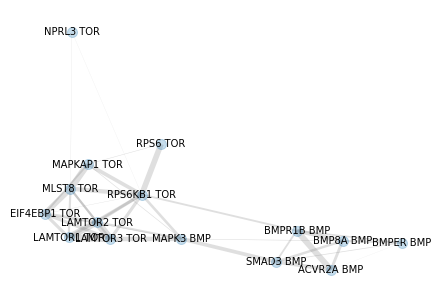

CAEEL {'Q02330': 'WBGene00004856', 'Q09488': 'WBGene00004860', 'Q9N4D6': 'WBGene00022279', 'Q95UF8': 'WBGene00001660', 'O17591': 'WBGene00007621', 'P91040': 'WBGene00015697', 'Q9N2U6': 'WBGene00022402', 'Q21694': 'WBGene00044281', 'X5LXA9': 'WBGene00018072', 'P34443': 'WBGene00010038', 'P34274': 'WBGene00022803', 'Q9NEN6': 'WBGene00004475'}
Graph with 8 nodes and 12 edges


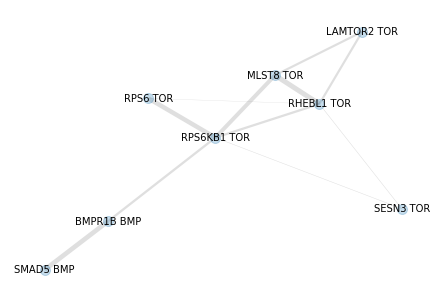

DANRE {'P85857': 'ENSDARG00000053479', 'B3DIP3': 'ENSDARG00000020057', 'O57574': 'ENSDARG00000019995', 'Q9W7E7': 'ENSDARG00000037238', 'F1R238': 'ENSDARG00000070050', 'Q7ZVK8': 'ENSDARG00000070573', 'Q1LWW7': 'ENSDARG00000035677', 'Q6DBS2': 'ENSDARG00000014626', 'Q9W6I7': 'ENSDARG00000044059', 'Q9W6I6': 'ENSDARG00000019920', 'Q9W7C0': 'ENSDARG00000031894', 'Q8AY15': 'ENSDARG00000036096', 'Q58FS4': 'ENSDARG00000037491', 'Q7ZVJ7': 'ENSDARG00000015822', 'X1WGI7': 'ENSDARG00000038094', 'Q7ZV98': 'ENSDARG00000012946', 'Q1LWV7': 'ENSDARG00000062951', 'X1WGE1': 'ENSDARG00000052741', 'A0A0R4IPN3': 'ENSDARG00000003167', 'Q503S6': 'ENSDARG00000057075', 'F1R3H0': 'ENSDARG00000039872', 'Q802Y7': 'ENSDARG00000058230', 'E9QIJ2': 'ENSDARG00000091777', 'Q6ZM11': 'ENSDARG00000010918', 'Q6PFK5': 'ENSDARG00000032353', 'Q6DHL6': 'ENSDARG00000019778', 'B3DGG5': 'ENSDARG00000016526', 'E7FBZ6': 'ENSDARG00000076464'}
Graph with 16 nodes and 25 edges


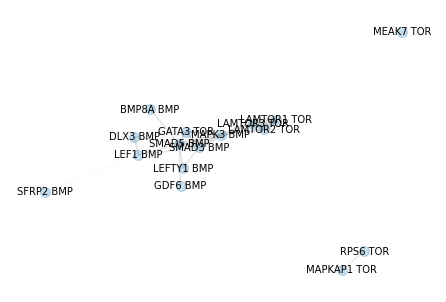

MOUSE {'P43028': 'ENSMUSG00000051279', 'O35607': 'ENSMUSG00000067336', 'P21275': 'ENSMUSG00000021835', 'P97454': 'ENSMUSG00000021540', 'A0A2R8W6U1': 'ENSMUSG00000016942', 'Q3UI35': 'ENSMUSG00000027996', 'Q63844': 'ENSMUSG00000063065', 'Q3TZB2': 'ENSMUSG00000032726', 'Q8CJ69': 'ENSMUSG00000031963', 'Q64205': 'ENSMUSG00000001510', 'D3Z3F8': 'ENSMUSG00000036580', 'Q99P68': 'ENSMUSG00000001494', 'P57785': 'ENSMUSG00000066652', 'A0A0R5T0P8': 'ENSMUSG00000038793', 'P36898': 'ENSMUSG00000052430', 'P20263': 'ENSMUSG00000024406', 'Q3TYB0': 'ENSMUSG00000027985', 'Q8BUN5': 'ENSMUSG00000032402', 'Q9Z0L4': 'ENSMUSG00000023279', 'Q3V1P4': 'ENSMUSG00000061731', 'A2AI38': 'ENSMUSG00000052155', 'A2RSF4': 'ENSMUSG00000032009', 'Q80U30': 'ENSMUSG00000068663', 'Q3U3B9': 'ENSMUSG00000031357', 'D3YXX3': 'ENSMUSG00000001729', 'A0A1D5RMA2': 'ENSMUSG00000034105', 'D3YYC9': 'ENSMUSG00000043051', 'Q8CIS0': 'ENSMUSG00000036526', 'Q9DCJ1': 'ENSMUSG00000024142', 'O88653': 'ENSMUSG00000091512', 'Q9JHS3': 'ENSMUSG000

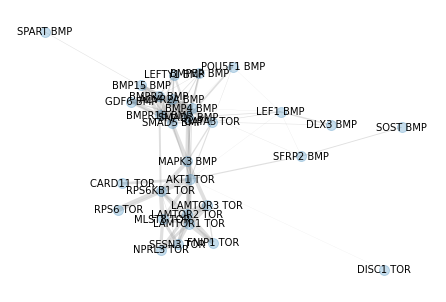

PIGXX {'A0A480NBZ7': 'ENSSSCG00000016113', 'A0A4X1WD52': 'ENSSSCG00000005045', 'F1RX31': 'ENSSSCG00000009004', 'F1RSH8': 'ENSSSCG00000017589', 'I3LMW6': 'ENSSSCG00000024635', 'I3L695': 'ENSSSCG00000028038', 'Q95L23': 'ENSSSCG00000029621', 'Q8WMY6': 'ENSSSCG00000012310', 'F1S274': 'ENSSSCG00000006009', 'I3LF09': 'ENSSSCG00000024955', 'A0A4X1UJ60': 'ENSSSCG00000009176', 'F2Z518': 'ENSSSCG00000006499', 'F1SJ12': 'ENSSSCG00000000186', 'F1RUM8': 'ENSSSCG00000011125', 'F2Z5W6': 'ENSSSCG00000014804'}
Graph with 6 nodes and 4 edges


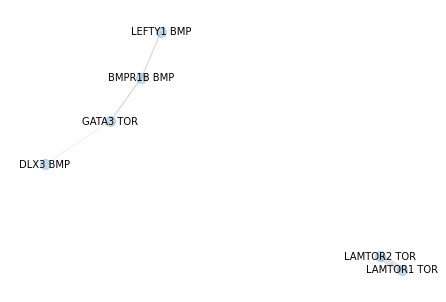

FELCA {'M3WK25': 'ENSFCAG00000014094', 'M3W2U0': 'ENSFCAG00000004772', 'M3X9P2': 'ENSFCAG00000025329', 'A0A5F5XTX3': 'ENSFCAG00000000789', 'M3WVG6': 'ENSFCAG00000031081', 'M3XDU9': 'ENSFCAG00000027658', 'M3XCQ5': 'ENSFCAG00000028596', 'A0A337SNA8': 'ENSFCAG00000023434', 'A0A2I2UDB4': 'ENSFCAG00000029143', 'M3VU36': 'ENSFCAG00000000096', 'M3WD87': 'ENSFCAG00000010425', 'M3W3V5': 'ENSFCAG00000005320', 'A0A337S3G6': 'ENSFCAG00000026363'}
Graph with 8 nodes and 10 edges


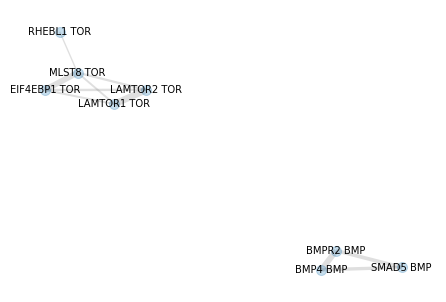

In [22]:
#next get interaction net from string for each species so we can compare with our profile based net
string_graphs = {}
for spec in qlists:
    print(spec, qlists[spec])
    #get string IDs for each protein
    mapper = map2string(qlists[spec], taxmap[spec] )
    rowmapper = {ID:i for i,ID in enumerate(mapper)}
    #make the string net using experimental evidence
    netdf = get_string_net(qlists[spec], taxmap[spec])
    netdf['x'] = netdf.stringId_A.map(rowmapper)
    netdf['y'] = netdf.stringId_B.map(rowmapper)
    netdf['Uniprot_A'] = netdf.stringId_A.map(mapper)
    netdf['Uniprot_B'] = netdf.stringId_B.map(mapper)
    netdf['name_A'] = netdf.Uniprot_A.map(names)
    netdf['name_B'] = netdf.Uniprot_B.map(names)
    
    
    #lets grab a network for each of our species of interest based on experimental data
    #we can remove the phylogenetic co-occurence channel from the evidence for a more independent verification
    #we can add the other evidence channels
    netdf['graphscore'] = netdf.ascore + netdf.escore + netdf.dscore
    #transform the string net to networkx
    G = nx.Graph()
    [ G.add_edge( row.name_A , row.name_B  , weight=row.graphscore ) for idx,row in netdf.iterrows() ]
    print(G)
    weights = np.asarray([e[2]['weight'] for e in G.edges(data = True)])
    weights/=3
    #max weight is 3 but we're scaling things from 0 to 1 to compare with our phylogenetic profiles
    pos = nx.spring_layout( G , weight='weight')
    
    nx.draw(G, pos=pos, edge_color='grey', width= 10*weights , node_size= 100 ,alpha = .25 ) 
    labels=nx.draw_networkx_labels(G , pos = pos , font_size= 10 )
    plt.show()
    string_graphs[spec] = G

In [ ]:
#now lets compare the overlap between the graphs
#each method will get its own color. 
#hopefully we see some agreement between all 3
#the phylogenetic profile wont change between species
#the other 2 will change

colors = ['r','g','b']

print('orthograph')
#let's start by selecting our tor pathway genes and making an interation graph
#based on their jaccard scores
select = orthosdf.index.map( lambda x : 'TOR' in x )
tor_orthodf = orthosdf[select]
distmat_ortho = cdist(tor_orthodf.to_numpy(), tor_orthodf.to_numpy() , metric = metrics[2])
pandas_adj = pd.DataFrame(distmat_ortho)
pandas_adj.index = tor_orthodf.index
pandas_adj.columns = tor_orthodf.index
ortho_graph = nx.from_pandas_adjacency(pandas_adj)
print(ortho_graph.nodes)
for spec in qlists:
    print(spec)
    #we can show all the graphs simultaneously in a multigraph
    G=nx.MultiGraph()
    #add phylo profiling graph
    G.add_edges_from(ortho_graph.edges)
    #add string graph
    String_graph = string_graphs[spec]
    print(String_graph.nodes)
    exclude = [ n for n in String_gaph.nodes if 'TOR' not in n ]
    String_graph.remove_nodes_from(exclude)
    G.add_edges_from( String_graph.edges )
    
    # and finally add the expression graph  

    pandas_adj = pd.DataFrame(expression_mats[spec])
    pandas_adj.index = expression_rowmappers[spec]
    pandas_adj.columns = expression_rowmappers[spec]

    select = [ n for n in pandas_adj.index if 'TOR' not in n]
    pandas_adj= pandas_adj.drop(select , axis = 0 )
    pandas_adj= pandas_adj.drop(select , axis = 1 )
    

    expression_graph = nx.from_pandas_adjacency(pandas_adj)
    print(expression_graph.nodes)

    G.add_edges_from(expression_graph.edges)
    
    pos = nx.spring_layout( G , weight='weight')

    #plot the whole mess
    nx.draw_networkx_nodes(G, pos, node_color = 'y', node_size = 100, alpha = 1)
    ax = plt.gca()
    for e in G.edges:
        
        ax.annotate("",
                    xy=pos[e[0]], xycoords='data',
                    xytext=pos[e[1]], textcoords='data',
                    arrowprops=dict(arrowstyle="-", color=colors[e[2]],
                                    shrinkA=5, shrinkB=5, lw = 10*e[2],
                                    patchA=None, patchB=None, alpha = .1,
                                    connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])
                                    ),
                                    ),
                    )
    plt.axis('off')
    plt.title(spec + ' network comparison')
    plt.show()